## Final Project Submission

Please fill out:
* Student name: clyde ochieng
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita  
* Blog post URL:


# Kings County Housing Analysis with Multiple Linear Regression

## Overview


In the grand scheme of things, a youthful duo is in the midst of orchestrating the sale of their abode, harboring aspirations to elevate its market worth with minimal financial resources allocated for refurbishments. In a strategic move, the couple has opted to employ Multiple Linear Regression Modeling to meticulously scrutinize and prognosticate house sales trends in King County, leveraging specific attributes or variables. This analytical approach is poised to empower them with insights to navigate the market intelligently, thereby facilitating judicious decisions for maximizing profitability.

Following a rigorous evaluation process and numerous iterations of our linear regression models, it has been ascertained that the dimensions of living space and the quality grade of the construction exhibit the most pronounced correlation with an augmented selling price of the property.

## Business Problem


The business quandary at hand revolves around providing insightful counsel to prospective homeowners regarding the potential impact of home renovations on the estimated value of their properties, alongside quantifying the magnitude of such enhancements.

In addressing this issue, we aim to equip homeowners, both buyers and sellers, with invaluable insights that can inform their decisions in the real estate market. Our focus lies in scrutinizing key factors such as building grade and square footage of living space, among others, to unveil the correlations that exist between these features and home sale prices. This comprehensive analysis seeks to elucidate the most influential attributes driving property values, thereby empowering stakeholders to make informed and strategic decisions pertaining to their real estate endeavors.

### Hypothesis


In crafting our hypotheses, we put forward the following propositions:

Null Hypothesis (H0): Within our model, we posit that there is an absence of any substantial association between the independent variables and the dependent variable (target).

Alternative Hypothesis (H1): Contrarily, we assert that a meaningful relationship does exist between the independent variables and the dependent variable (target) within our model.

To guide our analytical journey and ensure robust conclusions, we have established a significance level (alpha) of 0.05. This chosen threshold will serve as a pivotal benchmark against which we evaluate the statistical significance of our findings and shape our ultimate recommendations for stakeholders.

### Questions to be analyzed


Let's articulate the questions we aim to explore through our analysis:

Q1: Which features show the strongest correlation with the price of a home?

Q2: Among the predicting variables, which features exhibit the most significant correlations with each other?

Q3: What combinations of features offer the most reliable predictions for home prices?

These questions form the cornerstone of our investigation, guiding our efforts to uncover key insights that will assist homeowners, buyers, and sellers alike in navigating the complex landscape of real estate with confidence and clarity.

## Data Understanding


In our quest to gain a comprehensive understanding of the data under scrutiny, we turn our attention to the King County Housing dataset. This dataset encapsulates a wealth of information pertaining to over 21,000 homes situated in King County.

Each entry in the dataset provides detailed insights into various attributes of the homes, encompassing factors such as the number of bedrooms, bathrooms, and floors, as well as the square footage of both living space and lot, the zip code, building grade, and condition, among others.

The dataset comprises a multitude of features, each potentially contributing to the final sale price of homes in King County. Below, we delineate the descriptions of these features, laying the groundwork for a thorough exploration and analysis.

##### King County Housing Data Columns 

Below is a comprehensive breakdown of the columns present in the King County Housing dataset:

- `id`: A unique identifier assigned to each house.
- `date`: The date on which the house was sold. (This column will be ignored for our analysis.)
- `price`: The sale price of the house, serving as our prediction target.
- `bedrooms`: The number of bedrooms in the house.
- `bathrooms`: The number of bathrooms in the house.
- `sqft_living`: The square footage of the living space within the house.
- `sqft_lot`: The square footage of the lot on which the house is situated.
- `floors`: The number of floors or levels present in the house.
- `waterfront`: A binary indicator denoting whether the house is situated on a waterfront.
- `view`: An indication of the quality of the view from the house. (This column will be ignored for our analysis.)
- `condition`: An assessment of the overall condition of the house.
- `grade`: An overall grade assigned to the house.
- `sqft_above`: The square footage of the house, excluding the basement. (This column will be ignored for our analysis.)
- `sqft_basement`: The square footage of the basement within the house. (This column will be ignored for our analysis.)
- `yr_built`: The year in which the house was built.
- `yr_renovated`: The year in which the house was renovated. (This column will be ignored for our analysis.)
- `zipcode`: The ZIP code corresponding to the location of the house. (This column will be ignored for our analysis.)
- `lat`: The latitude coordinate of the house. (This column will be ignored for our analysis.)
- `long`: The longitude coordinate of the house. (This column will be ignored for our analysis.)
- `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors. (This column will be ignored for our analysis.)
- `sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors. (This column will be ignored for our analysis.)


### Explotory Data Analyis

As we set sail on our journey of exploration, our first port of call involves the pivotal task of importing the dataset. This foundational step lays the groundwork for our subsequent analyses and insights, ushering us into the realm of data-driven discovery and understanding.

In [311]:
#load necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

##### Eliminating Irrelevant Columns
In our quest for clarity and focus, we embark on the process of streamlining our dataset by removing columns that are deemed irrelevant to our current analysis. This strategic pruning ensures that we hone in on the most pertinent features, thereby enhancing the efficacy and interpretability of our subsequent explorations.

In [312]:
# reading the csv file
# eliminating irrelevant columns
df = pd.read_csv('data/kc_house_data.csv').drop(['date',
                                                 'view', 
                                                 'sqft_above', 
                                                 'sqft_basement', 
                                                 'yr_renovated',
                                                 'zipcode', 
                                                 'lat', 
                                                 'long', 
                                                 'sqft_living15',
                                                 'sqft_lot15'], axis = 1)
# previewing the DataFrame
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [313]:
df.shape

(21597, 11)

The dataset comprises 21,597 houses, each characterized by 11 features.

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [315]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [316]:
# indepth statistics for price dataframe.
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


The dataset indicates that the average price of homes is $540,297. Prices within the dataset range from $78,000 to $8,000,000. Additionally, the median house price is reported to be $450,000.

In [317]:
# indepth statistics for square footage
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

The dataset reveals that the mean square footage of living space is 2,080 sq-ft, with living space ranging from 370 sq-ft to 13,540 sq-ft. The median square footage is reported to be 1,910 sq-ft.

In [318]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

The bedroom counts in the dataset vary from 1 bedroom to 33 bedrooms.

In [319]:
df['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [320]:
df['floors'].value_counts()

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: count, dtype: int64

In [321]:
df['sqft_lot'].value_counts()

sqft_lot
5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: count, Length: 9776, dtype: int64

In [322]:
df['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [323]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64


The dataset indicates that houses were built between the years 1934 and 2014.

In [324]:
df['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [325]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

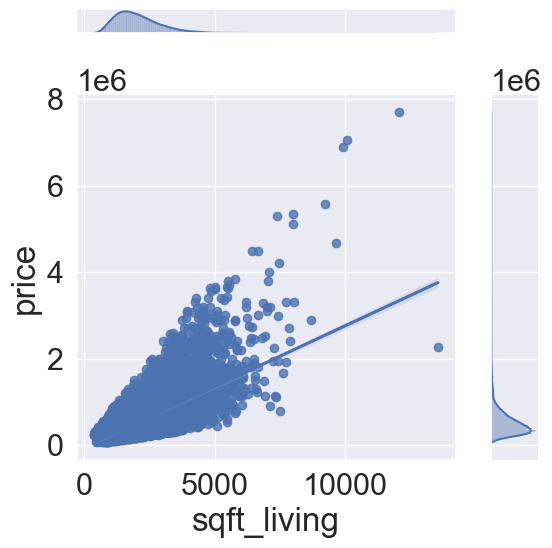

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'df' is your DataFrame containing the 'sqft_living' and 'price' columns

# Specify the column names as strings
sns_plot = sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
plt.tight_layout()

# Save the plot as a PNG file
sns_plot.savefig("jointplot.png")

plt.show()


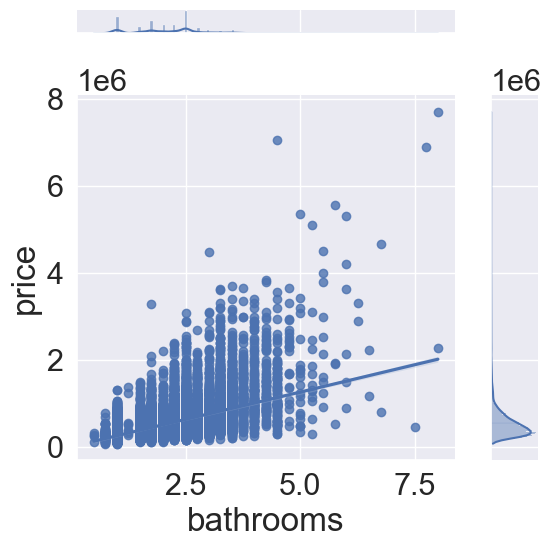

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

#Use named argument for 'data'
sns_plot = sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
plt.tight_layout()

# Save the plot as a PNG file
sns_plot.savefig("jointplot.png")

plt.show()



## Data Preparation
Data preparation involves essential preprocessing and feature engineering steps to ensure tabular data is ready for statistical modeling.

Data Cleaning Steps
Handling Missing Values
Identify and address any missing values.

Handling Non-Numeric Data
Convert non-numeric data types to numeric ones.

This notebook provides a detailed breakdown of the steps used to compile, clean, and transform our data. It explores various iterations and examines the effects of different transformations on the dataset.

### Preprocessing with Scikit-learn
We'll delve into exploring and cleaning our dataset to prepare it for our Linear Regression Model.

Preprocessing Steps
1. Dealing with Missing Values
2. Converting Categorical Features to Numeric
3. Detecting and Eliminating Outliers

##### Missing Values
Below, we'll verify if there are any NaNs present in our dataset.

In [328]:
#locate missing values
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [329]:
#dealing with missing values
for column in df.columns:
    percentage_of_nan = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, percentage_of_nan)

id 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
condition 0.0
grade 0.0
yr_built 0.0


The 'waterfront' feature stands out as the only one containing missing values, approximately 11% of which are represented as NaNs. It's crucial to delve into this feature to address these gaps in data.

In [330]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64


Since the 'waterfront' feature consists solely of two values, 'yes' or 'no', we can infer that NaN values indicate 'no', as they imply the absence of waterfront property in the residences.

In [331]:
df['waterfront'].fillna('NO', inplace=True)

In [332]:
df['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

In [333]:
#confirm missing values
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

##### Transform categorical features into numerical representations


Our model may encounter issues due to non-numeric columns. While numeric features are compatible, these specific features require conversion:

* waterfront (object)
* condition (object)
* grade (object)
Let's examine the value counts for these features to understand their distributions:

In [334]:
print(df['waterfront'].value_counts())
print()
print(df['condition'].value_counts())
print()
print(df['grade'].value_counts())

waterfront
NO     21451
YES      146
Name: count, dtype: int64

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64


##### create a function to split the numeric value from the 'grade' feature.


The Grade feature lists the numeric grade at the beginning, even though it's stored as an object data type. We'll employ a straightforward string split function to isolate the numeric portion of the feature.

Waterfront, with only 2 categories, can be directly converted into binary. However, Condition, with more than 2 categories, will require expansion into multiple columns.

In [335]:
df = df.assign(grade=df.grade.str.split(' ')).explode('grade')

In [336]:
df.duplicated().value_counts()

False    46360
True         6
Name: count, dtype: int64

In [337]:
df = df.drop_duplicates()

In [338]:
df.shape

(46360, 11)

In [339]:
df = df.drop_duplicates(subset='id')

In [340]:
df.dropna()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,Average,8,2004


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


In [342]:
df['grade'].value_counts()

grade
7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: count, dtype: int64

common buiding grade is a 7

In [343]:
# Change the data from object to int.
df['grade'] = df['grade'].astype(int)

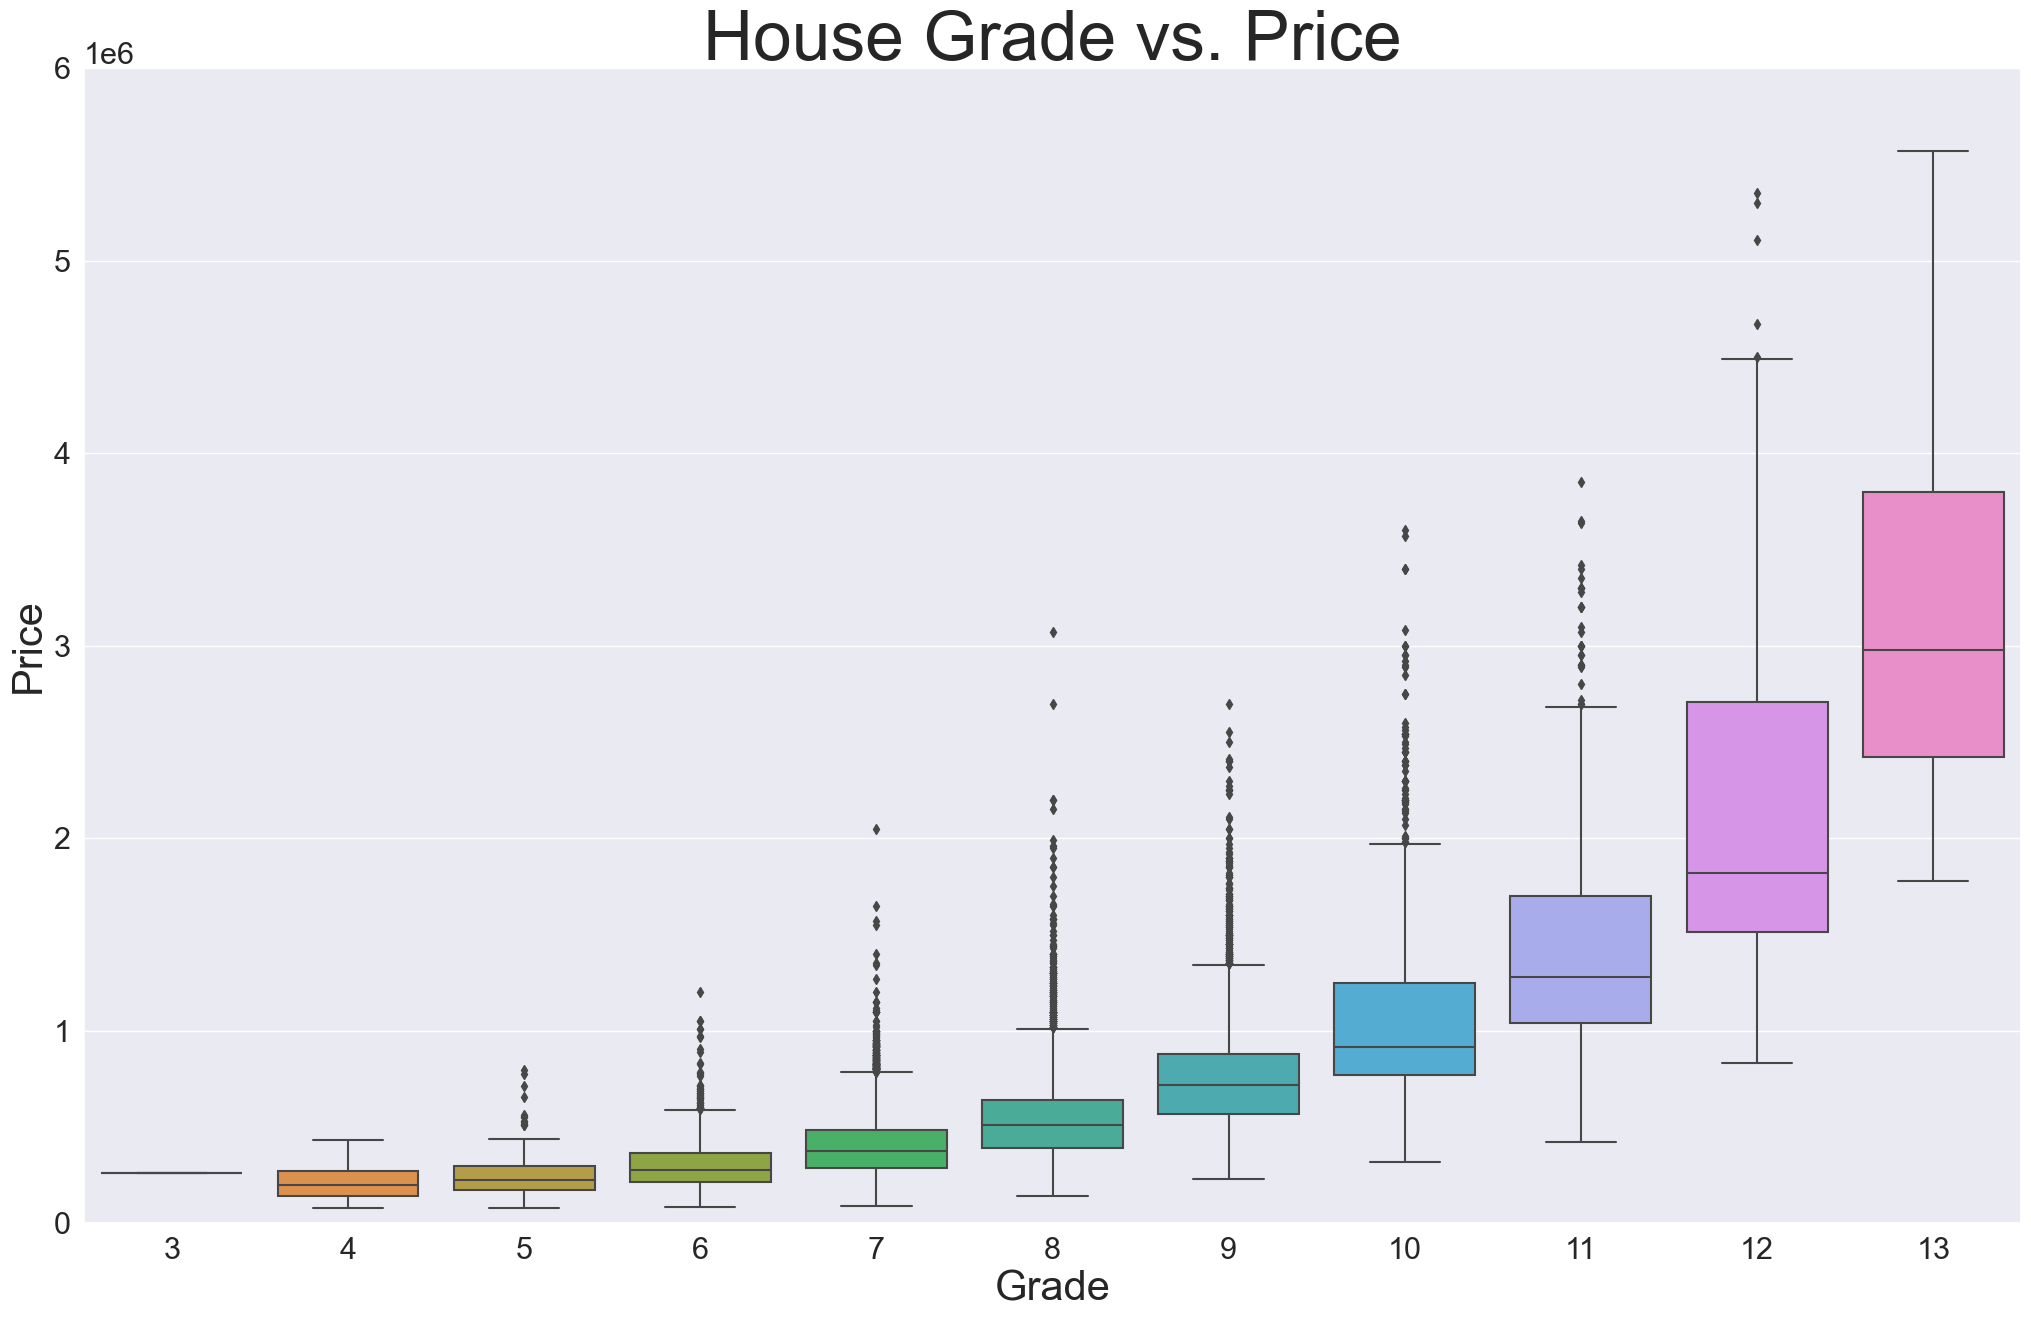

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
sns.set(font_scale=2)
ax = sns.boxplot(x="grade", y="price", data=df)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000)

plt.savefig('grade.png')



Upon examining the grade feature, it becomes evident that as the categorical building grade designation improves, there's a corresponding increase in house prices.

##### Binary Categories : OrdinalEncoder
To convert binary categories like Waterfront into binary values using an OrdinalEncoder, follow these steps:

Identify the data to be transformed.
Instantiate the OrdinalEncoder object.
Fit the OrdinalEncoder object to the data.
Transform the data using the fitted encoder object.

In [345]:
# create a variable waterfront_train that contains the
# relevant column from df
waterfront_train = df[['waterfront']]

# Initiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# Fit the encoder on waterfront_train
encoder_waterfront.fit(waterfront_train)

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [346]:
# Transform waterfront_train using the encoder and 
# assign the result to waterfront_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

#Visually inspect waterfront_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [347]:
# Replace value of Street
df['waterfront'] = waterfront_encoded_train

# Visually inspect df
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,Average,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,Average,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,Average,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,Very Good,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,Average,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,Average,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,Average,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,Average,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,Average,8,2004


In [348]:
df['waterfront'].value_counts()

waterfront
0.0    21274
1.0      146
Name: count, dtype: int64

##### Transforming the 'condition' column using .map()

In [349]:
df['condition'].value_counts()

condition
Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: count, dtype: int64

In [350]:
condition_mapping = {
    "Average": 3,
    "Good": 4,
    "Very Good": 5,
    "Fair": 2,
    "Poor": 1
}

In [351]:
df['condition'].map(condition_mapping)

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21420, dtype: int64

In [352]:
df['condition'] = df['condition'].map(condition_mapping)
df['condition'].value_counts()

condition
3    13900
4     5643
5     1687
2      162
1       28
Name: count, dtype: int64

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  float64
 8   condition    21420 non-null  int64  
 9   grade        21420 non-null  int32  
 10  yr_built     21420 non-null  int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.9 MB


##### Outliers:

The dataset contains both single-family and multi-family units. For instance, those with more than 8 bedrooms or more than 5 bathrooms. To better analyze these distinct building types, we've opted to segregate them. Therefore, we've chosen to eliminate rows containing any outlier values."

In [354]:
# define function to describe outliers
def outliers_description(df):
    print('Outlier Data Description')
    describe = df.describe()

    describe.loc['+3_std'] = describe.loc['mean'] + (describe.loc['std'] * 3)
    describe.loc['-3_std'] = describe.loc['mean'] - (describe.loc['std'] * 3)
    print(describe)

In [355]:
outliers_description(df)

Outlier Data Description
                  id         price      bedrooms     bathrooms   sqft_living  \
count   2.142000e+04  2.142000e+04  21420.000000  21420.000000  21420.000000   
mean    4.580940e+09  5.407393e+05      3.373950      2.118429   2083.132633   
std     2.876761e+09  3.679311e+05      0.925405      0.768720    918.808412   
min     1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%     2.123537e+09  3.225000e+05      3.000000      1.750000   1430.000000   
50%     3.904921e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%     7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max     9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   
+3_std  1.321122e+10  1.644533e+06      6.150163      4.424589   4839.557868   
-3_std -4.049344e+09 -5.630540e+05      0.597736     -0.187731   -673.292602   

            sqft_lot        floors    waterfront     condition         grade  \
count   2.1420

##### Removing Outliers Beyond 3 Standard Deviations from the Mean

In [356]:
def remove_outliers(df, features):
    print("Outliers Removed Count")
    
    x = len(df)
    
    for feature in features:
        df[feature + '_zscore'] = np.abs(stats.zscore(df[feature]))
        y = df.loc[np.abs(df[feature + '_zscore']) > 3]
        percent = round((len(y) * 100) / x, 3)
        
        print(len(y), "outliers removed for", feature)
        
        df = df.loc[np.abs(df[feature + '_zscore']) < 3]
        
        df = df.drop([feature + '_zscore'], axis=1)
    
    return df

In [357]:
outliers = df[['bedrooms', 'bathrooms', 'sqft_living']]
df = remove_outliers(df, outliers)

Outliers Removed Count
62 outliers removed for bedrooms
171 outliers removed for bathrooms
209 outliers removed for sqft_living


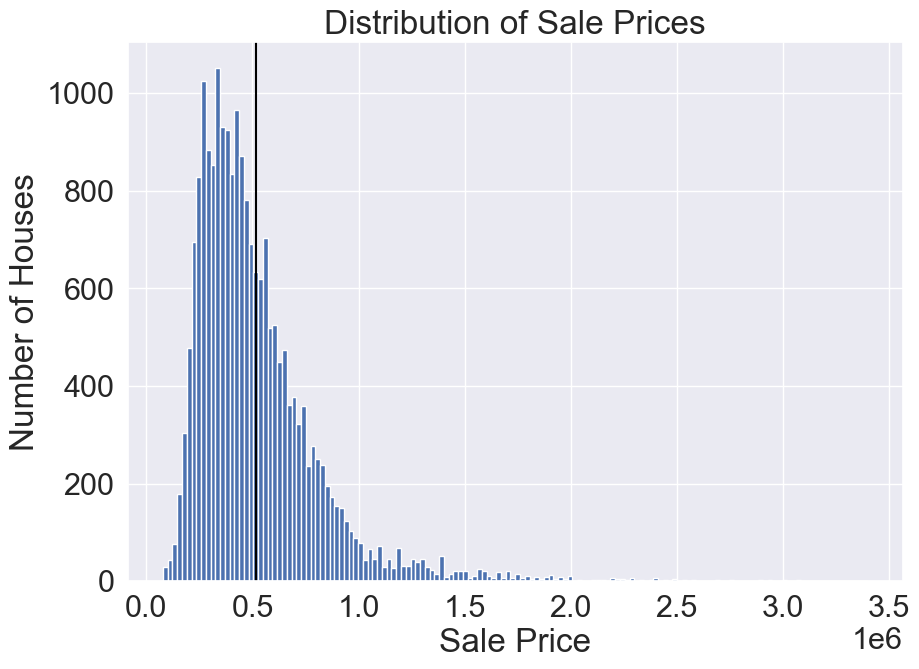

In [358]:
import matplotlib.pyplot as plt

def plot_histogram(df, column, title, xlabel, ylabel, save_path=None):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # Save plot as PNG if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plot_histogram(
    df,
    "price",
    "Distribution of Sale Prices",
    "Sale Price",
    "Number of Houses",
    save_path="histogram.png"
)


In [359]:
def print_stats(df, column):    
    print("Mean:              ", df[column].mean())
    print("Median:            ", df[column].median())
    print("Standard Deviation:", df[column].std())
    
print_stats(df, "price")

Mean:               518066.6351415769
Median:             447000.0
Standard Deviation: 301071.6722828131


It appears to follow a log-normal distribution. The majority of houses in this sample cluster around the median value of $447,000. However, the presence of higher-end homes is pushing the mean up to over $518,066.

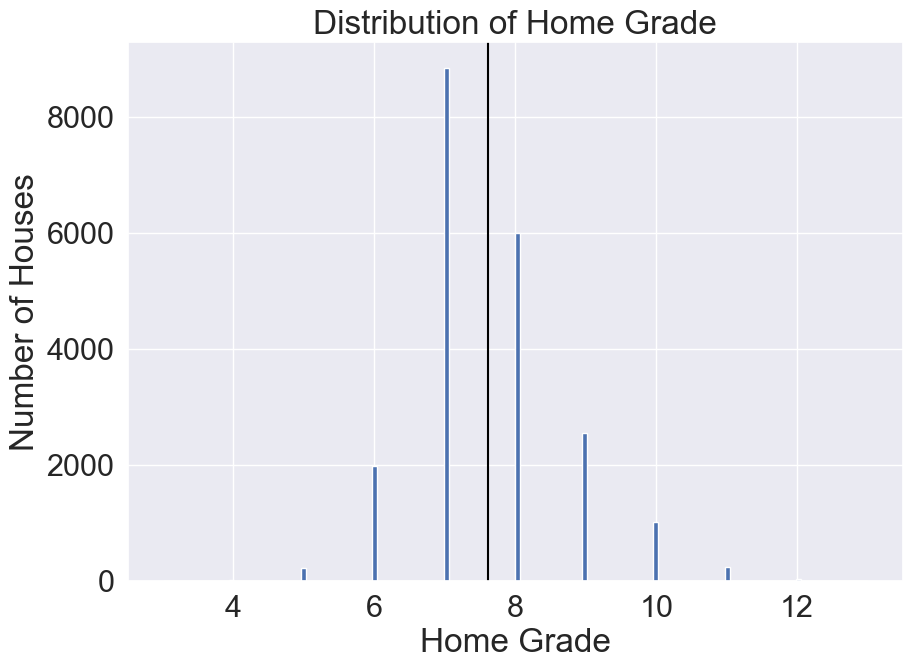

In [360]:
import matplotlib.pyplot as plt

def plot_histogram(df, column, title, xlabel, ylabel, save_path=None):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # Save plot as PNG if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plot_histogram(
    df,
    "grade",
    "Distribution of Home Grade",
    "Home Grade",
    "Number of Houses",
    save_path="grade_histogram.png"
)


In [361]:
print_stats(df, 'grade')

Mean:               7.610115358947469
Median:             7.0
Standard Deviation: 1.1050580688804281


Grade is approximately normally distributed.

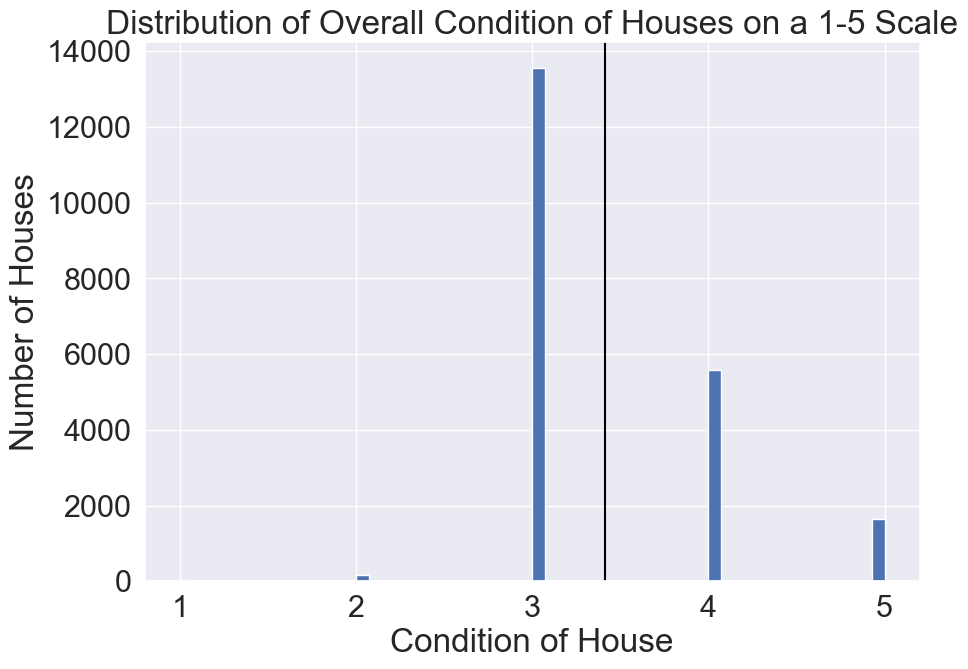

In [362]:
import matplotlib.pyplot as plt

def plot_histogram(df, column, title, xlabel, ylabel, save_path=None):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # Save plot as PNG if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

plot_histogram(
    df,
    "condition",
    "Distribution of Overall Condition of Houses on a 1-5 Scale",
    "Condition of House",
    "Number of Houses",
    save_path="condition_histogram.png"
)


In [363]:
print_stats(df, 'condition')

Mean:               3.4131947754790732
Median:             3.0
Standard Deviation: 0.6509397347766206


The majority of homes have a condition rating of 3. Given the abrupt difference between conditions, it seems more appropriate to treat this variable as categorical rather than numeric.

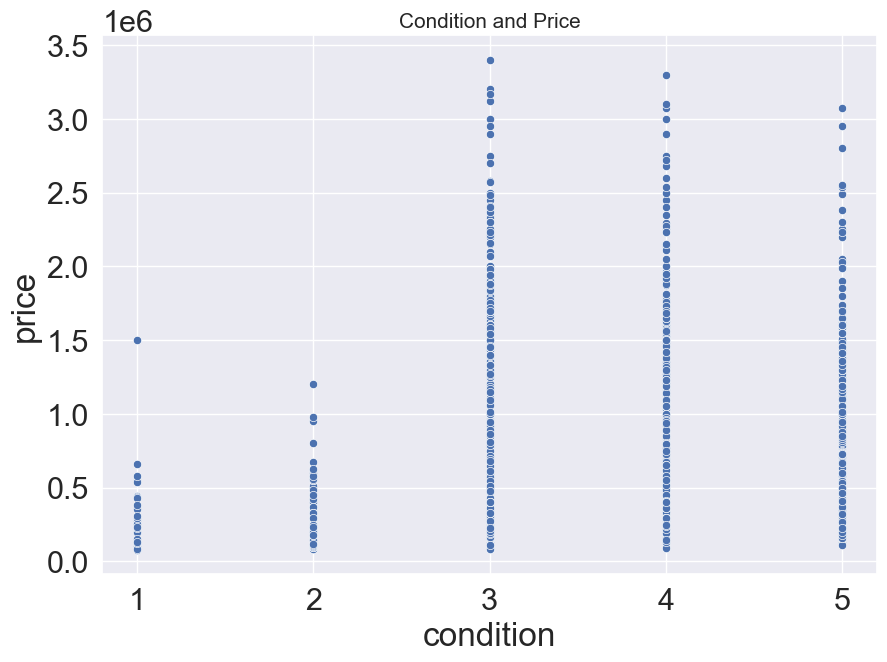

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.scatterplot(x=df['condition'], y=df['price'])
plt.title('Condition and Price', fontsize=15)
plt.savefig("condition_price_scatter.png", bbox_inches='tight')
plt.show()



The condition variable in the dataset is expected to be strongly correlated with price, yet it lacks a clear linear relationship

A helpful approach for exploring a categorical variable involves dividing the full dataset into subsets based on that categorical variable, and then plotting their distributions based on another variable.

In [365]:
below_average_condition = df[df["condition"] < 3]
average_condition = df[df["condition"] == 3]
above_average_condition = df[df["condition"] > 3]

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20978 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20978 non-null  int64  
 1   price        20978 non-null  float64
 2   bedrooms     20978 non-null  int64  
 3   bathrooms    20978 non-null  float64
 4   sqft_living  20978 non-null  int64  
 5   sqft_lot     20978 non-null  int64  
 6   floors       20978 non-null  float64
 7   waterfront   20978 non-null  float64
 8   condition    20978 non-null  int64  
 9   grade        20978 non-null  int32  
 10  yr_built     20978 non-null  int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 1.8 MB


In [367]:
# Change the data type from object to int.
df['price'] = df['price'].astype(int)

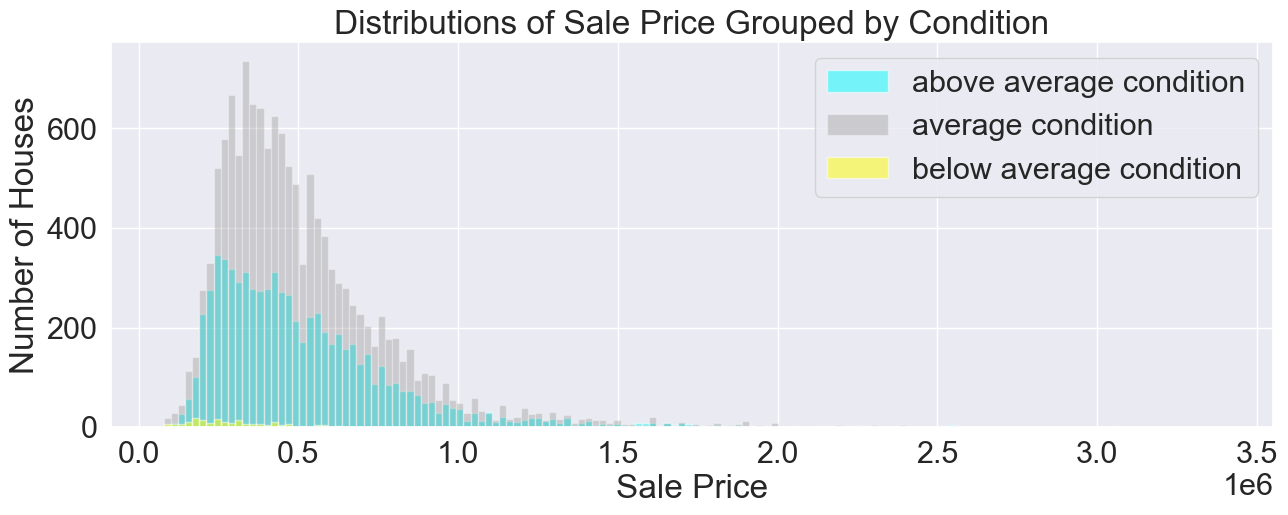

In [368]:
import matplotlib.pyplot as plt

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["price"].min(), df["price"].max(), int(df["price"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["price"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["price"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["price"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend()

# Save plot as PNG
plt.savefig("sale_price_by_condition.png", bbox_inches='tight')

# Display the plot
plt.show()



Surprisingly, houses rated as above-average condition do not exhibit higher average sale prices compared to those with average condition ratings. Further investigation is warranted to comprehend the characteristics of houses rated as above-average condition, as this contradicts the typical assumption that better condition correlates with higher costs.

### Assumptions

Now that we have finished cleaning the data set let's begin to make our initial assumptions. We'll test the normality of distribution for several independent variables as well as their linearity to the Price. If the variable appears to be normally distributed and linear we will use that in our initial model.

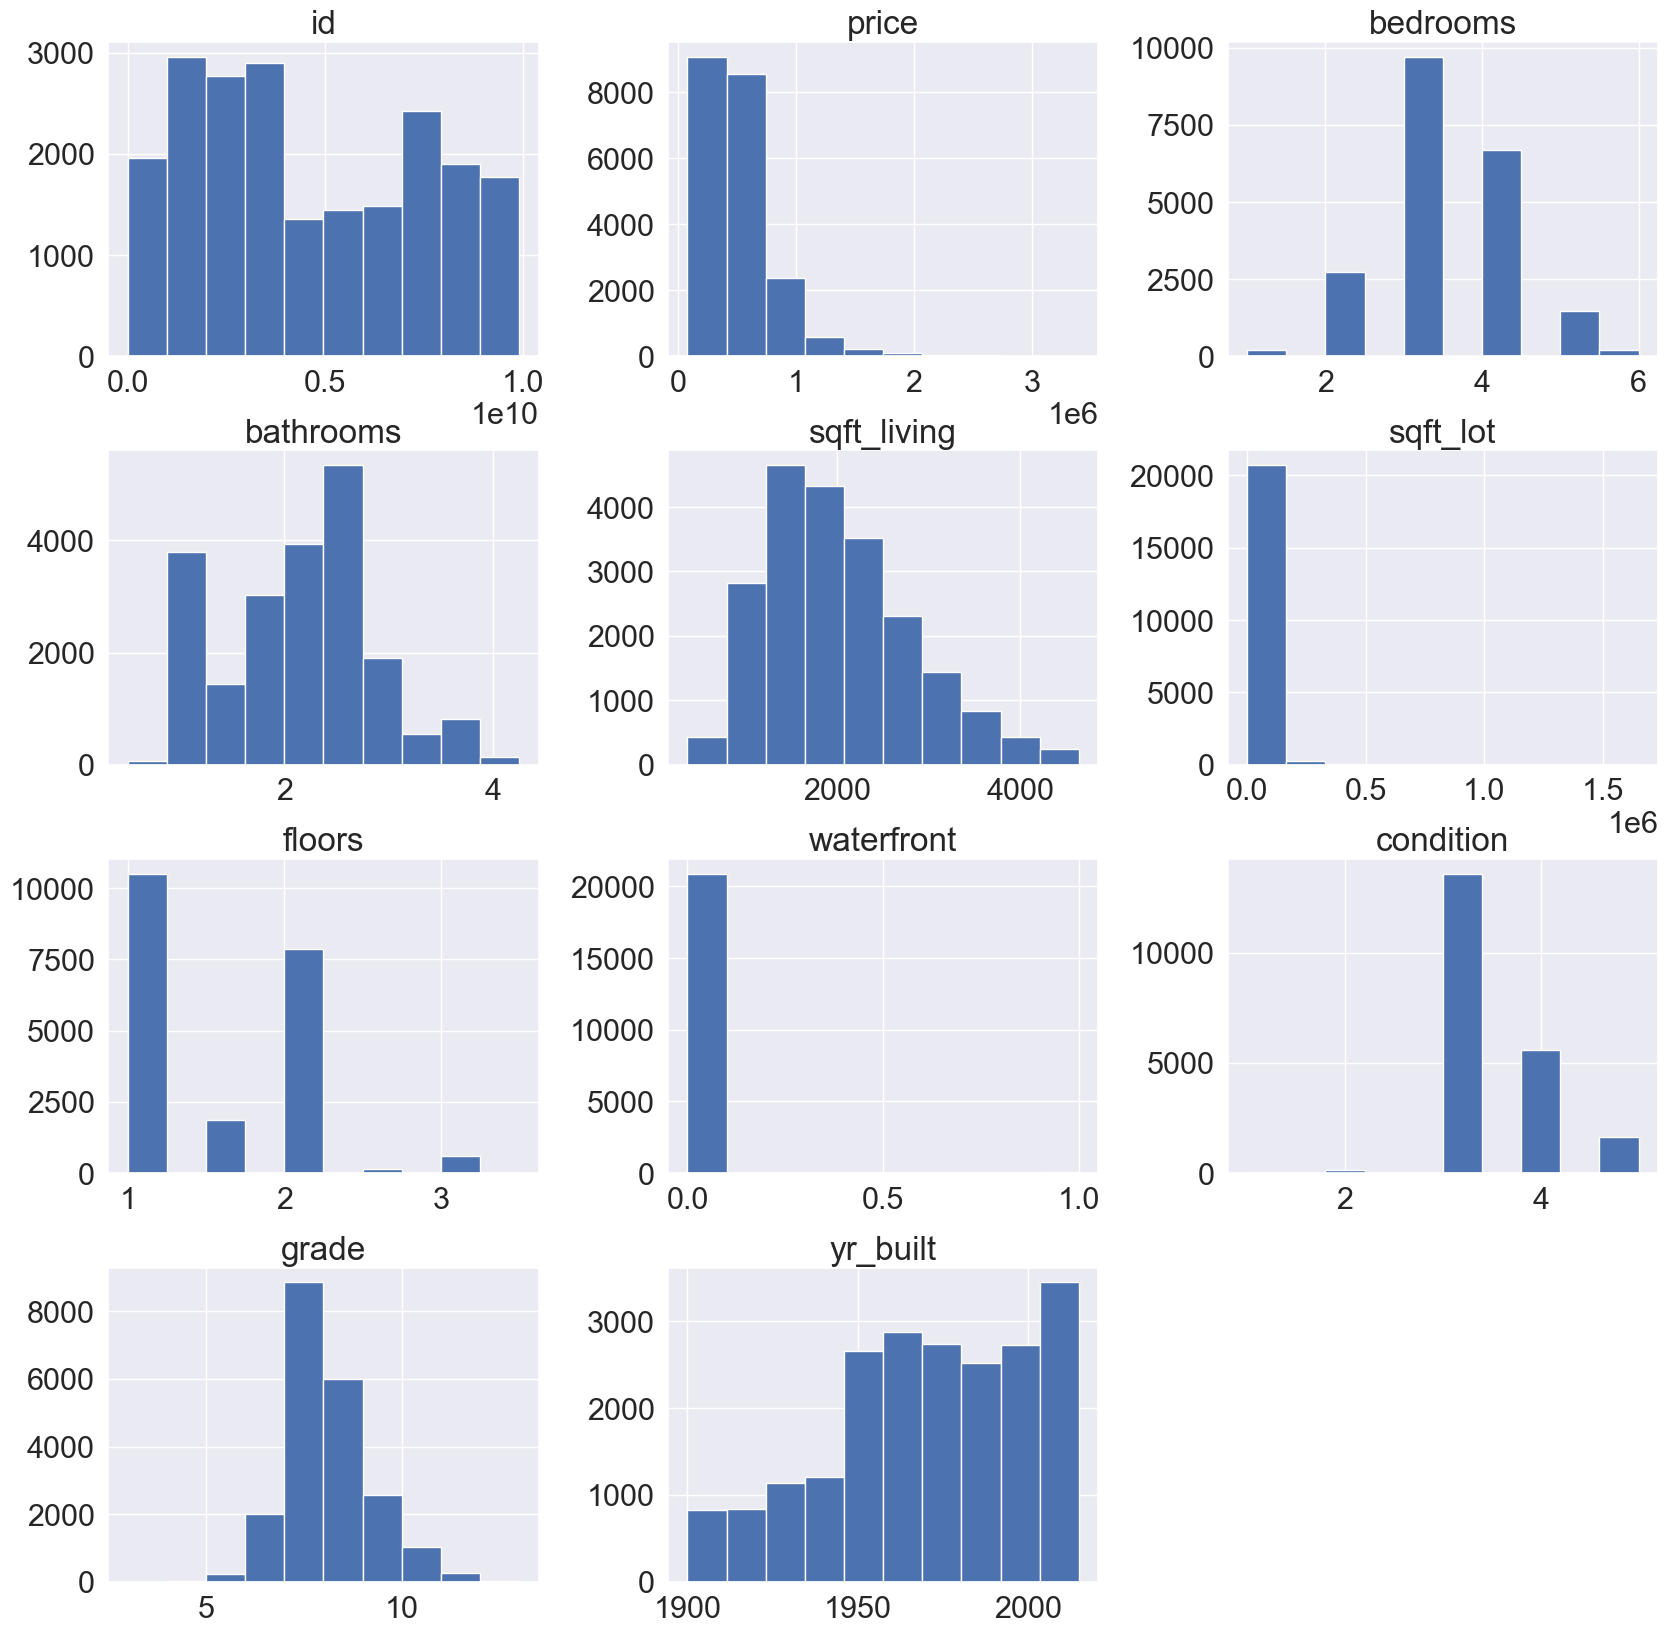

In [369]:
import matplotlib.pyplot as plt

# Review distribution of variables
df.hist(figsize=(20,20))

# Save plot as PNG
plt.savefig("variable_distribution.png", bbox_inches='tight')

# Display the plot
plt.show()


##### Reviewing Correlations and Addressing Multicollinearity

Our goal is to identify the variables most strongly correlated with price, as they are promising candidates for inclusion in our model. However, one assumption of a multiple linear regression model is the absence of multicollinearity among explanatory variables. Below, we generate a correlation matrix of price and continuous variables in the dataset to visualize these correlations.

##### Explore Correlations

To gain insight into which features of these homes contribute to higher sale prices, let's examine some correlations.

In [370]:
# list of correlations with SalePrice, sorted from smallest
# to largest
correlation_series = df.corr()['price'].sort_values()
# Select second to last correlation, since the highest (last)
# correlation will be SalePrice correlating 100% with itself
max_corr_value = correlation_series.iloc[-2]
max_corr_column = correlation_series.index[-2]
print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Most Positively Correlated Column: grade
Maximum Correlation Value: 0.6515434324583883


In [371]:
correlation_series = df.corr()['price'].sort_values()
max_corr_value = correlation_series.iloc[-3]
max_corr_column = correlation_series.index[-3]
print("Second Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Second Most Positively Correlated Column: sqft_living
Maximum Correlation Value: 0.6472777070874484


In [372]:
correlation_series = df.corr()['price'].sort_values()
max_corr_value = correlation_series.iloc[-4]
max_corr_column = correlation_series.index[-4]
print("Third Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Third Most Positively Correlated Column: bathrooms
Maximum Correlation Value: 0.4696317325722415


##### Q1: Which features show the strongest correlation with home prices?

The grade of the houses, the square footage of living space (sqft_living), and the number of bathrooms exhibit the highest correlation with price.

In [373]:
# We only need to find the smallest value, as we're not excluding the perfect correlation with itself.
min_corr_value = correlation_series.iloc[1]
min_corr_column = correlation_series.index[1]

print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Most Negatively Correlated Column: yr_built
Minimum Correlation Value: 0.03304060821765139


In [374]:
min_corr_value = correlation_series.iloc[2]
min_corr_column = correlation_series.index[2]

print("Second Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Second Most Negatively Correlated Column: condition
Minimum Correlation Value: 0.05131668178239331


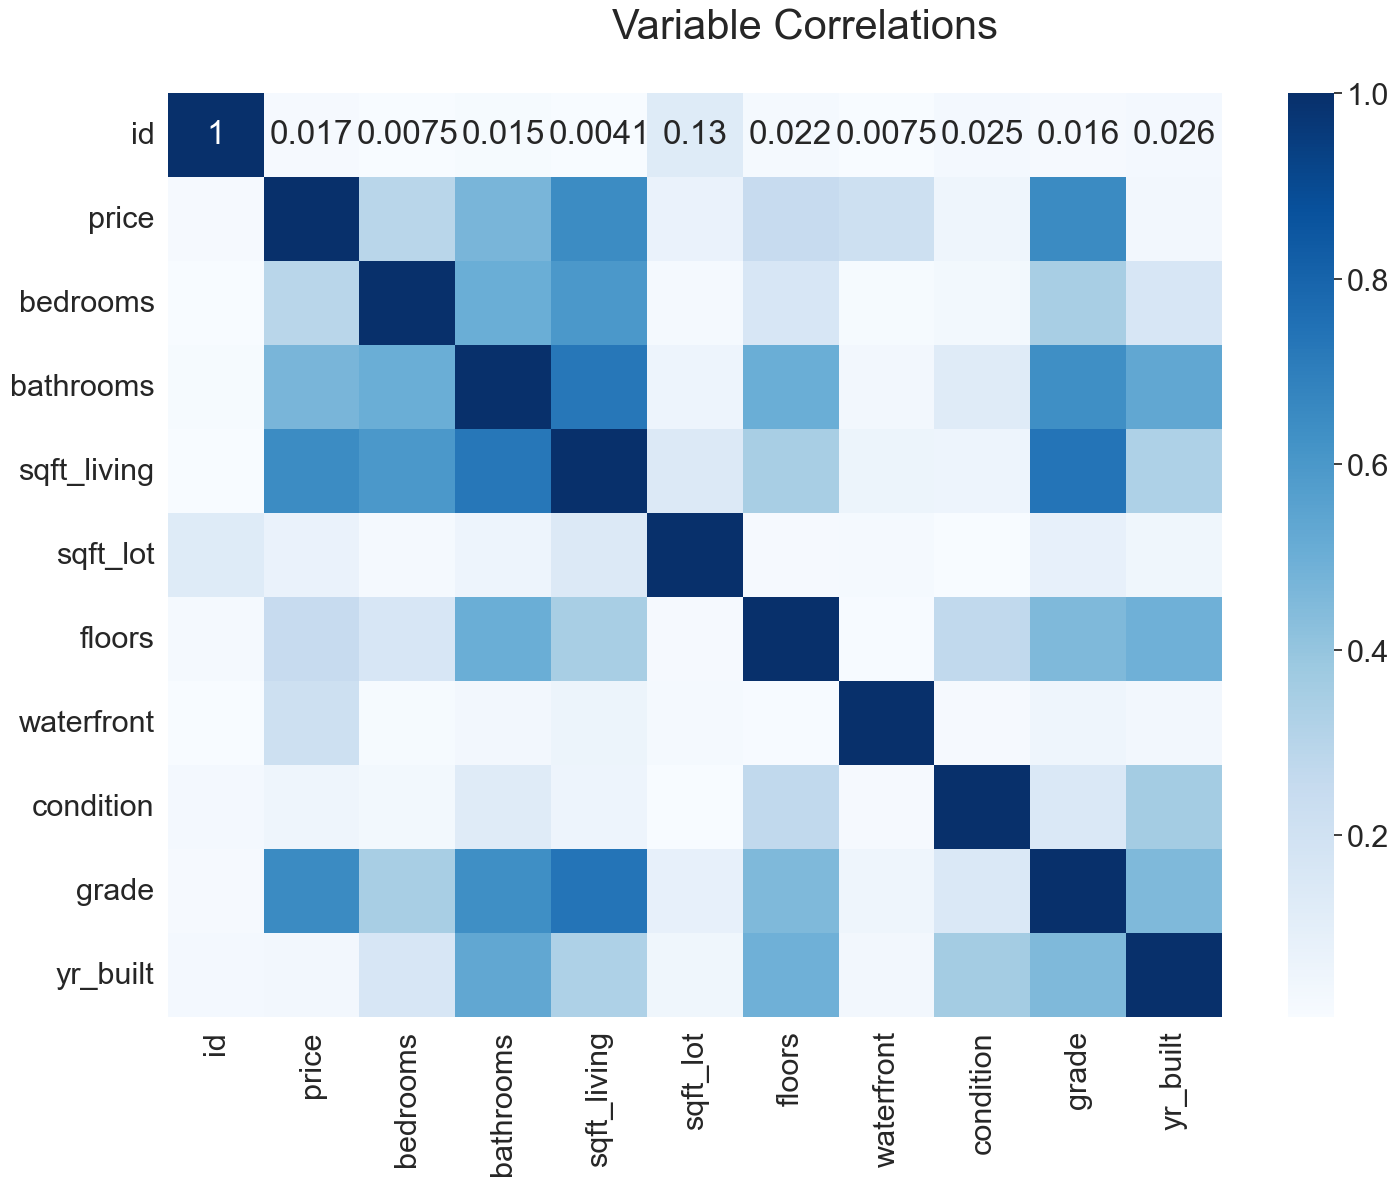

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr().abs()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(17,12))

# Set the title
fig.suptitle('Variable Correlations', fontsize=30, y=.95)

# Create the heatmap
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

# Save plot as PNG
plt.savefig("correlation_heatmap.png", bbox_inches='tight')

# Display the plot
plt.show()


In [376]:
import pandas as pd

# Create lists to store features and correlations
features = []
correlations = []

# Iterate through the correlations with the 'price' column
for idx in corr['price'].index:
    correlation = corr['price'][idx]
    if correlation >= 0.30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)

# Create DataFrame
corr_price_df = pd.DataFrame({'Correlations': correlations, 'Features': features})

# Sort DataFrame by Correlations in descending order
corr_price_df = corr_price_df.sort_values(by='Correlations', ascending=False)

# Display DataFrame
print(corr_price_df)


   Correlations     Features
2      0.651543        grade
1      0.647278  sqft_living
0      0.469632    bathrooms


In [377]:
import pandas as pd

Multicollinear_Features = []
Multicollinear_Corr = []

def check_multicollinearity(feature):
    for idx in corr[feature].index:
        correlation = corr[feature][idx]
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)

for feature in corr:
    check_multicollinearity(feature)

MC_df = pd.DataFrame({'Correlations': Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

print(MC_df)


   Correlations                  Features
2      0.737053      [sqft_living, grade]
3      0.737053      [grade, sqft_living]
0      0.725613  [bathrooms, sqft_living]
1      0.725613  [sqft_living, bathrooms]


In [378]:
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
2,0.651543,grade
1,0.647278,sqft_living
0,0.469632,bathrooms


Multicollinear Features


,Correlations,Features
2,0.737053,"[sqft_living, grade]"
3,0.737053,"[grade, sqft_living]"
0,0.725613,"[bathrooms, sqft_living]"
1,0.725613,"[sqft_living, bathrooms]"


##### Q2: What features have the strongest correlations with other predicQ2: Which features exhibit the strongest correlations with other predictor variables?

None of our features have a correlation exceeding 0.75, indicating that multicollinearity is not a concern. However, sqft_living and grade display the highest correlation among our data.

In [379]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.000000,-0.017185,0.007509,0.015375,-0.004123,-0.131456,0.022023,-0.007457,-0.025194,0.016228,0.025617
price,-0.017185,1.000000,0.294247,0.469632,0.647278,0.072836,0.251965,0.216155,0.051317,0.651543,0.033041
bedrooms,0.007509,0.294247,1.000000,0.502386,0.598196,0.022481,0.166861,-0.015706,0.029669,0.349646,0.165938
bathrooms,0.015375,0.469632,0.502386,1.000000,0.725613,0.058334,0.505936,0.033232,-0.128354,0.637203,0.529347
sqft_living,-0.004123,0.647278,0.598196,0.725613,1.000000,0.143944,0.346984,0.060978,-0.056413,0.737053,0.330360
sqft_lot,-0.131456,0.072836,0.022481,0.058334,0.143944,1.000000,-0.017644,0.022358,-0.005974,0.089541,0.043590
floors,0.022023,0.251965,0.166861,0.505936,0.346984,-0.017644,1.000000,0.011859,-0.268988,0.453326,0.492854
waterfront,-0.007457,0.216155,-0.015706,0.033232,0.060978,0.022358,0.011859,1.000000,0.018361,0.053071,-0.032005
condition,-0.025194,0.051317,0.029669,-0.128354,-0.056413,-0.005974,-0.268988,0.018361,1.000000,-0.151066,-0.361670
grade,0.016228,0.651543,0.349646,0.637203,0.737053,0.089541,0.453326,0.053071,-0.151066,1.000000,0.452886


## Data Modeling
Before constructing any linear regression model, three assumptions about the data need to be checked:

There should be a linear relationship between the explanatory and response variables.
The data should exhibit homoscedasticity, meaning the residuals have equal variance around the regression line on a scatterplot.
The model residuals should follow a normal distribution, observed through a relatively straight line on a QQ plot.
These assumptions, along with the assumption of no multicollinearity, also apply to multiple regression.

In addition to assessing these assumptions, we'll examine two values in the model summary:

R-squared: This value indicates the proportion of variability in the response variable that can be explained by the model. It ranges between 0 and 1, with higher values indicating greater predictive power.
p-value: In linear regression, the null hypothesis states that there is no relationship between the chosen explanatory variables and the response variable. Hence, we aim for a p-value lower than 0.05 to reject the null hypothesis.

### Model #1: Baseline Model
##### Let's construct a baseline model using the top two features correlated with price.

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20978 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20978 non-null  int64  
 1   price        20978 non-null  int32  
 2   bedrooms     20978 non-null  int64  
 3   bathrooms    20978 non-null  float64
 4   sqft_living  20978 non-null  int64  
 5   sqft_lot     20978 non-null  int64  
 6   floors       20978 non-null  float64
 7   waterfront   20978 non-null  float64
 8   condition    20978 non-null  int64  
 9   grade        20978 non-null  int32  
 10  yr_built     20978 non-null  int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 1.8 MB


In [381]:
home_preds0 = df.drop(['price', 
                       'id', 
                       'bathrooms', 
                       'bedrooms', 
                       'waterfront',
                       'sqft_lot', 
                       'floors',  
                       'condition', 
                       'yr_built'], axis=1)
home_target0 = df['price']
home_preds0.head()

,sqft_living,grade
0,1180,7
1,2570,7
2,770,6
3,1960,7
4,1680,8


In [382]:
import statsmodels.api as sm

# Assuming home_preds0 is your DataFrame
predictors0 = sm.add_constant(home_preds0)
predictors0


,const,sqft_living,grade
0,1.0,1180,7
1,1.0,2570,7
2,1.0,770,6
3,1.0,1960,7
4,1.0,1680,8
...,...,...,...
21592,1.0,1530,8
21593,1.0,2310,8
21594,1.0,1020,7
21595,1.0,1600,8


In [383]:
modelbaseline = sm.OLS(home_target0, predictors0).fit()

In [384]:
modelbaseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     9901.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:57:31   Log-Likelihood:            -2.8743e+05
No. Observations:               20978   AIC:                         5.749e+05
Df Residuals:                   20975   BIC:                         5.749e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.521e+05   1.18e+04    -46.786      0.000   -5.75e+05   -5.29e+05
sqft_living   137.6391      2.758     49.914      0.000     132.234     143.044
grade        1.041e+05   1996.367     52.128      0.000       1e+05    1.08e+05
==============================================================================
Omnibus:                    10657.564   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129013.168
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                      14.355   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The baseline model's R-squared value is 0.486. Let's endeavor to enhance its accuracy

### Model #2: using train_test_split

In [385]:
y = df['price']
X = df.drop('price', axis=1)

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [387]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 15733 rows and 10 columns
y_train is a Series with 15733 values


In [388]:
# Declare relevant columns
relevant_columns = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'waterfront',
    'floors',
    'condition',
    'grade',
    'yr_built'
]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[:, relevant_columns]

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,condition,grade,yr_built
4438,4,2.50,2770,6000,0.0,2.0,3,8,1993
15353,4,1.50,2480,6383,0.0,1.0,3,7,1946
6845,4,2.50,2320,7800,0.0,2.0,3,8,1986
18197,3,1.50,1930,11092,0.0,1.0,3,7,1983
2198,4,3.75,4490,34982,0.0,2.0,3,12,1998
...,...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,3,8,1963
12305,2,1.50,1140,1149,0.0,2.0,3,7,2001
5551,2,2.00,1060,4000,0.0,1.0,2,7,1914
889,3,2.50,3000,25341,0.0,2.0,3,9,1995


We might uncover a more distinct linear relationship between price and specific condition values by employing one-hot encoding for the variable.

##### Multiple Categories
In contrast to the 'waterfront' feature, 'condition' encompasses more than two categories. Hence, we'll need to create multiple columns, each representing one category. To achieve this, we'll utilize
##### OneHotEncoder from sklearn.preprocessing

In [389]:
from sklearn.preprocessing import OneHotEncoder

# Create a variable condition_train extracted from X_train
condition_train = X_train[['condition']]

# Instantiate a OneHotEncoder
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')

# Fit the encoder on condition_train
ohe.fit(condition_train)

# Inspect the categories of the fitted encoder
ohe.categories_


[array([1, 2, 3, 4, 5], dtype=int64)]

In [390]:
# Transform condition_train using the encoder and assign the result to condition_encoded_train
condition_encoded_train = ohe.transform(condition_train)

# Convert the sparse matrix to a dense array
condition_encoded_train_array = condition_encoded_train.toarray()

condition_encoded_train_array


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [391]:
# Transform condition_train using the encoder and assign the result to condition_encoded_train
condition_encoded_train = ohe.transform(condition_train)

# Convert the sparse matrix to a dense array
condition_encoded_train_array = condition_encoded_train.toarray()

# Make the transformed data into a DataFrame
condition_encoded_train_df = pd.DataFrame(
    condition_encoded_train_array,
    columns=ohe.categories_[0]
)

# Set the index of the DataFrame to match X_train
condition_encoded_train_df.index = X_train.index

condition_encoded_train_df


,1,2,3,4,5
4438,0.0,0.0,1.0,0.0,0.0
15353,0.0,0.0,1.0,0.0,0.0
6845,0.0,0.0,1.0,0.0,0.0
18197,0.0,0.0,1.0,0.0,0.0
2198,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
11604,0.0,0.0,1.0,0.0,0.0
12305,0.0,0.0,1.0,0.0,0.0
5551,0.0,1.0,0.0,0.0,0.0
889,0.0,0.0,1.0,0.0,0.0


In [392]:
# Drop original condition column
X_train.drop('condition', axis=1, inplace=True)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built
4438,4,2.50,2770,6000,0.0,2.0,8,1993
15353,4,1.50,2480,6383,0.0,1.0,7,1946
6845,4,2.50,2320,7800,0.0,2.0,8,1986
18197,3,1.50,1930,11092,0.0,1.0,7,1983
2198,4,3.75,4490,34982,0.0,2.0,12,1998
...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,8,1963
12305,2,1.50,1140,1149,0.0,2.0,7,2001
5551,2,2.00,1060,4000,0.0,1.0,7,1914
889,3,2.50,3000,25341,0.0,2.0,9,1995


In [393]:
import pandas as pd
from scipy.sparse import csr_matrix

# Assuming condition_encoded_train is your one-hot encoded matrix
# Convert the csr_matrix to a DataFrame
condition_encoded_train_df = pd.DataFrame.sparse.from_spmatrix(
    condition_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

# Concatenate the new dataframe with the current df
X_train = pd.concat([X_train, condition_encoded_train_df], axis=1)

X_train


,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,1,2,3,4,5
4438,4,2.50,2770,6000,0.0,2.0,8,1993,0.0,0.0,1.0,0.0,0.0
15353,4,1.50,2480,6383,0.0,1.0,7,1946,0.0,0.0,1.0,0.0,0.0
6845,4,2.50,2320,7800,0.0,2.0,8,1986,0.0,0.0,1.0,0.0,0.0
18197,3,1.50,1930,11092,0.0,1.0,7,1983,0.0,0.0,1.0,0.0,0.0
2198,4,3.75,4490,34982,0.0,2.0,12,1998,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,8,1963,0.0,0.0,1.0,0.0,0.0
12305,2,1.50,1140,1149,0.0,2.0,7,2001,0.0,0.0,1.0,0.0,0.0
5551,2,2.00,1060,4000,0.0,1.0,7,1914,0.0,1.0,0.0,0.0,0.0
889,3,2.50,3000,25341,0.0,2.0,9,1995,0.0,0.0,1.0,0.0,0.0


In [394]:
# dropping a column related to condition to avoid the dummy variable trap
X_train.drop(1, axis=1, inplace=True)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,2,3,4,5
4438,4,2.50,2770,6000,0.0,2.0,8,1993,0.0,1.0,0.0,0.0
15353,4,1.50,2480,6383,0.0,1.0,7,1946,0.0,1.0,0.0,0.0
6845,4,2.50,2320,7800,0.0,2.0,8,1986,0.0,1.0,0.0,0.0
18197,3,1.50,1930,11092,0.0,1.0,7,1983,0.0,1.0,0.0,0.0
2198,4,3.75,4490,34982,0.0,2.0,12,1998,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11604,4,2.75,2640,35070,0.0,1.5,8,1963,0.0,1.0,0.0,0.0
12305,2,1.50,1140,1149,0.0,2.0,7,2001,0.0,1.0,0.0,0.0
5551,2,2.00,1060,4000,0.0,1.0,7,1914,1.0,0.0,0.0,0.0
889,3,2.50,3000,25341,0.0,2.0,9,1995,0.0,1.0,0.0,0.0


In [395]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype             
---  ------       --------------  -----             
 0   bedrooms     15733 non-null  int64             
 1   bathrooms    15733 non-null  float64           
 2   sqft_living  15733 non-null  int64             
 3   sqft_lot     15733 non-null  int64             
 4   waterfront   15733 non-null  float64           
 5   floors       15733 non-null  float64           
 6   grade        15733 non-null  int32             
 7   yr_built     15733 non-null  int64             
 8   2            1 non-null      Sparse[float64, 0]
 9   3            1 non-null      Sparse[float64, 0]
 10  4            1 non-null      Sparse[float64, 0]
 11  5            1 non-null      Sparse[float64, 0]
dtypes: Sparse[float64, 0](4), float64(3), int32(1), int64(4)
memory usage: 1.2 MB


In [396]:
# Convert all feature names to strings
X_train.columns = X_train.columns.astype(str)

# Now you can proceed to train your linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [397]:
# use cross validation to take a look at the model's performance:
cross_val_score(model, X_train, y_train, cv=3)

array([0.61210062, 0.60849282, 0.59087099])

##### Preprocess for Test Data
Steps on Test Data

In [398]:
# Preprocess Test Data
X_test = X_test.loc[:, relevant_columns]

In [399]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,condition,grade,yr_built
2597,2,1.00,900,7620,0.0,1.0,3,7,1971
4481,4,2.50,2020,7277,0.0,2.0,3,8,1993
7616,3,1.75,1300,7735,0.0,1.0,4,7,1980
8953,4,2.25,3190,11597,0.0,2.0,3,10,1984
5575,4,1.75,1780,9794,0.0,1.0,3,7,1967
...,...,...,...,...,...,...,...,...,...
3088,2,2.00,1780,3810,0.0,1.5,3,7,1922
8182,5,2.50,1970,8605,0.0,2.0,4,7,1994
18357,2,1.75,950,15219,0.0,1.0,3,8,2009
1319,3,1.50,1380,6657,0.0,2.0,3,7,1986


In [400]:
# Transform condition_test using the encoder and assign the result to condition_encoded_test
condition_encoded_test = ohe.transform(condition_test)

# Convert the sparse matrix to a dense array
condition_encoded_test_array = condition_encoded_test.toarray()

# Make the transformed data into a DataFrame
condition_encoded_test_df = pd.DataFrame(
    condition_encoded_test_array,
    columns=ohe.categories_[0],
    index=X_test.index
)

# Drop the original "condition" column from X_test
X_test.drop("condition", axis=1, inplace=True)

# Concatenate X_test with the encoded condition data
X_test = pd.concat([X_test, condition_encoded_test_df], axis=1)

X_test


,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,1,2,3,4,5
2597,2,1.00,900,7620,0.0,1.0,7,1971,0.0,0.0,1.0,0.0,0.0
4481,4,2.50,2020,7277,0.0,2.0,8,1993,0.0,0.0,1.0,0.0,0.0
7616,3,1.75,1300,7735,0.0,1.0,7,1980,0.0,0.0,0.0,1.0,0.0
8953,4,2.25,3190,11597,0.0,2.0,10,1984,0.0,0.0,1.0,0.0,0.0
5575,4,1.75,1780,9794,0.0,1.0,7,1967,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,2,2.00,1780,3810,0.0,1.5,7,1922,0.0,0.0,1.0,0.0,0.0
8182,5,2.50,1970,8605,0.0,2.0,7,1994,0.0,0.0,0.0,1.0,0.0
18357,2,1.75,950,15219,0.0,1.0,8,2009,0.0,0.0,1.0,0.0,0.0
1319,3,1.50,1380,6657,0.0,2.0,7,1986,0.0,0.0,1.0,0.0,0.0


In [401]:
X_test.drop(1, axis=1, inplace=True)
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,2,3,4,5
2597,2,1.00,900,7620,0.0,1.0,7,1971,0.0,1.0,0.0,0.0
4481,4,2.50,2020,7277,0.0,2.0,8,1993,0.0,1.0,0.0,0.0
7616,3,1.75,1300,7735,0.0,1.0,7,1980,0.0,0.0,1.0,0.0
8953,4,2.25,3190,11597,0.0,2.0,10,1984,0.0,1.0,0.0,0.0
5575,4,1.75,1780,9794,0.0,1.0,7,1967,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3088,2,2.00,1780,3810,0.0,1.5,7,1922,0.0,1.0,0.0,0.0
8182,5,2.50,1970,8605,0.0,2.0,7,1994,0.0,0.0,1.0,0.0
18357,2,1.75,950,15219,0.0,1.0,8,2009,0.0,1.0,0.0,0.0
1319,3,1.50,1380,6657,0.0,2.0,7,1986,0.0,1.0,0.0,0.0


In [402]:
# Convert all feature names to strings in X_test
X_test.columns = X_test.columns.astype(str)

# Now you can use the model's score method
model.score(X_test, y_test)


0.617288818755894

In [403]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype             
---  ------       --------------  -----             
 0   bedrooms     15733 non-null  int64             
 1   bathrooms    15733 non-null  float64           
 2   sqft_living  15733 non-null  int64             
 3   sqft_lot     15733 non-null  int64             
 4   waterfront   15733 non-null  float64           
 5   floors       15733 non-null  float64           
 6   grade        15733 non-null  int32             
 7   yr_built     15733 non-null  int64             
 8   2            1 non-null      Sparse[float64, 0]
 9   3            1 non-null      Sparse[float64, 0]
 10  4            1 non-null      Sparse[float64, 0]
 11  5            1 non-null      Sparse[float64, 0]
dtypes: Sparse[float64, 0](4), float64(3), int32(1), int64(4)
memory usage: 1.2 MB


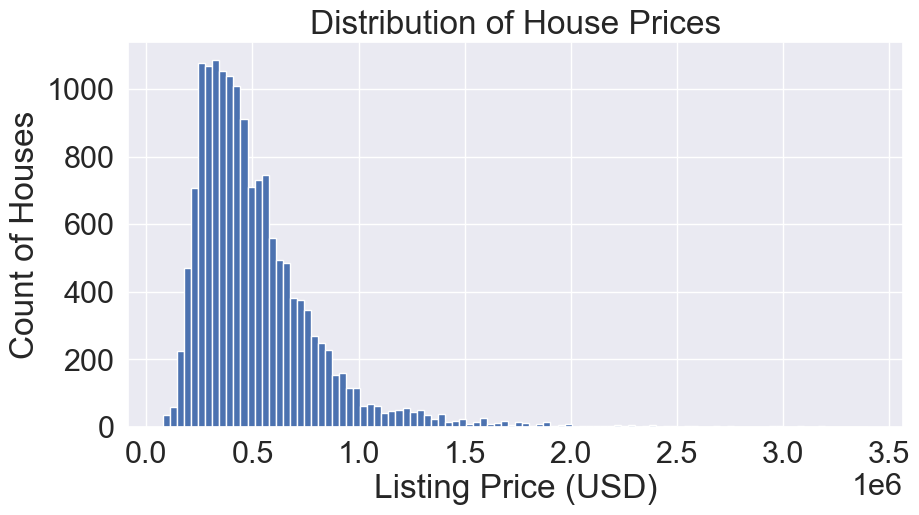

In [404]:
import matplotlib.pyplot as plt

# A visualization of the distribution of the target variable
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices")

plt.savefig("house_price_distribution.png", bbox_inches='tight')
plt.show()


##### Interpreting a Correlation Heatmap

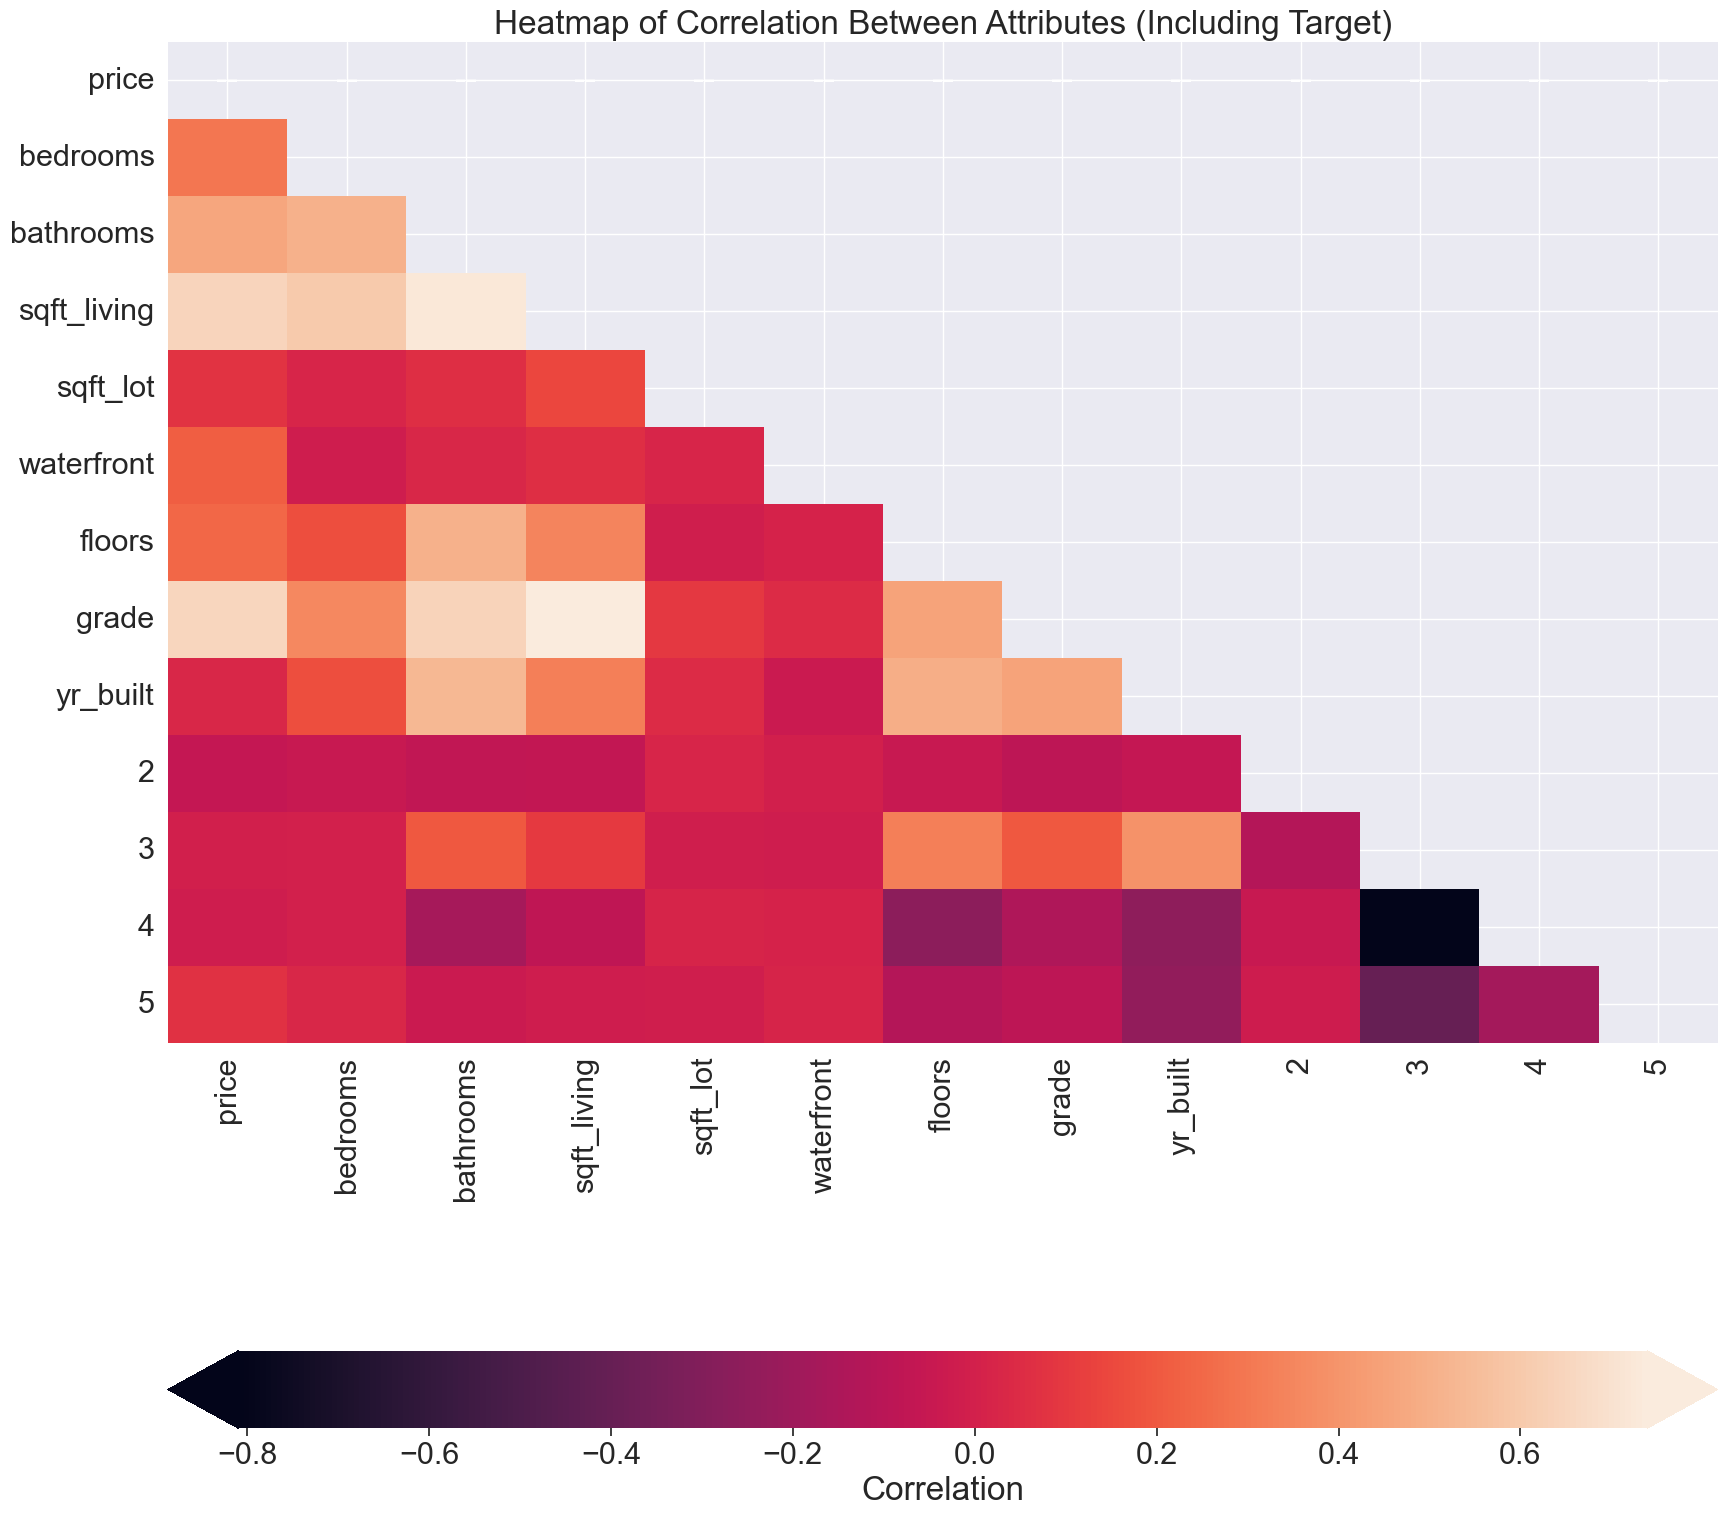

In [405]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Set title
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)")

# Save the plot as PNG
plt.savefig("heatmap_with_figures.png", bbox_inches='tight')

# Show the plot
plt.show()

In [406]:
most_correlated_feature = 'grade'

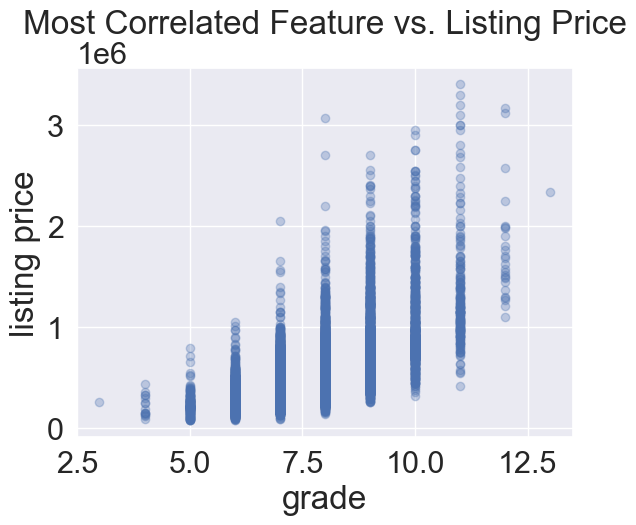

In [407]:
# Create scatter plot
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.3)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price")

# Save the plot as PNG
plt.savefig("scatter_plot.png")

# Show the plot
plt.show()


In [408]:
baseline_model = LinearRegression()

In [409]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4219222881153983
Validation score: 0.4199230132032204


In [410]:
w = X_train
k = y_train

In [411]:
X_intw = sm.add_constant(w)
X_intw

,const,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,grade,yr_built,2,3,4,5
4438,1.0,4,2.50,2770,6000,0.0,2.0,8,1993,0.0,1.0,0.0,0.0
15353,1.0,4,1.50,2480,6383,0.0,1.0,7,1946,0.0,1.0,0.0,0.0
6845,1.0,4,2.50,2320,7800,0.0,2.0,8,1986,0.0,1.0,0.0,0.0
18197,1.0,3,1.50,1930,11092,0.0,1.0,7,1983,0.0,1.0,0.0,0.0
2198,1.0,4,3.75,4490,34982,0.0,2.0,12,1998,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,1.0,4,2.75,2640,35070,0.0,1.5,8,1963,0.0,1.0,0.0,0.0
12305,1.0,2,1.50,1140,1149,0.0,2.0,7,2001,0.0,1.0,0.0,0.0
5551,1.0,2,2.00,1060,4000,0.0,1.0,7,1914,1.0,0.0,0.0,0.0
889,1.0,3,2.50,3000,25341,0.0,2.0,9,1995,0.0,1.0,0.0,0.0


In [412]:
model1 = sm.OLS(k,X_intw).fit()

In [413]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2010.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:57:44   Log-Likelihood:            -2.1360e+05
No. Observations:               15733   AIC:                         4.272e+05
Df Residuals:                   15720   BIC:                         4.273e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.248e+06   1.36e+05     45.958      0.000    5.98e+06    6.51e+06
bedrooms    -3.418e+04   2300.737    -14.854      0.000   -3.87e+04   -2.97e+04
bathrooms    4.541e+04   3685.584     12.320      0.000    3.82e+04    5.26e+04
sqft_living   134.6878      3.685     36.554      0.000     127.465     141.910
sqft_lot       -0.0739      0.038     -1.963      0.050      -0.148      -0.000
waterfront   6.071e+05   1.99e+04     30.437      0.000    5.68e+05    6.46e+05
floors       2.776e+04   3554.094      7.809      0.000    2.08e+04    3.47e+04
grade        1.343e+05   2254.597     59.571      0.000     1.3e+05    1.39e+05
yr_built    -3604.5959     68.996    -52.243      0.000   -3739.837   -3469.355
2            2.458e+04   4.41e+04      0.557      0.577   -6.19e+04    1.11e+05
3            4.773e+04   4.09e+04      1.168      0.243   -3.23e+04    1.28e+05
4            6.359e+04   4.09e+04      1.556      0.120   -1.65e+04    1.44e+05
5            1.004e+05   4.11e+04      2.442      0.015    1.98e+04    1.81e+05
==============================================================================
Omnibus:                     7150.736   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86958.778
Skew:                           1.863   Prob(JB):                         0.00
Kurtosis:                      13.898   Cond. No.                     3.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### the R Squared value increased to 0.605

### Model #3: Dropping multicollinear features

In [414]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype             
---  ------       --------------  -----             
 0   bedrooms     15733 non-null  int64             
 1   bathrooms    15733 non-null  float64           
 2   sqft_living  15733 non-null  int64             
 3   sqft_lot     15733 non-null  int64             
 4   waterfront   15733 non-null  float64           
 5   floors       15733 non-null  float64           
 6   grade        15733 non-null  int32             
 7   yr_built     15733 non-null  int64             
 8   2            1 non-null      Sparse[float64, 0]
 9   3            1 non-null      Sparse[float64, 0]
 10  4            1 non-null      Sparse[float64, 0]
 11  5            1 non-null      Sparse[float64, 0]
dtypes: Sparse[float64, 0](4), float64(3), int32(1), int64(4)
memory usage: 1.2 MB


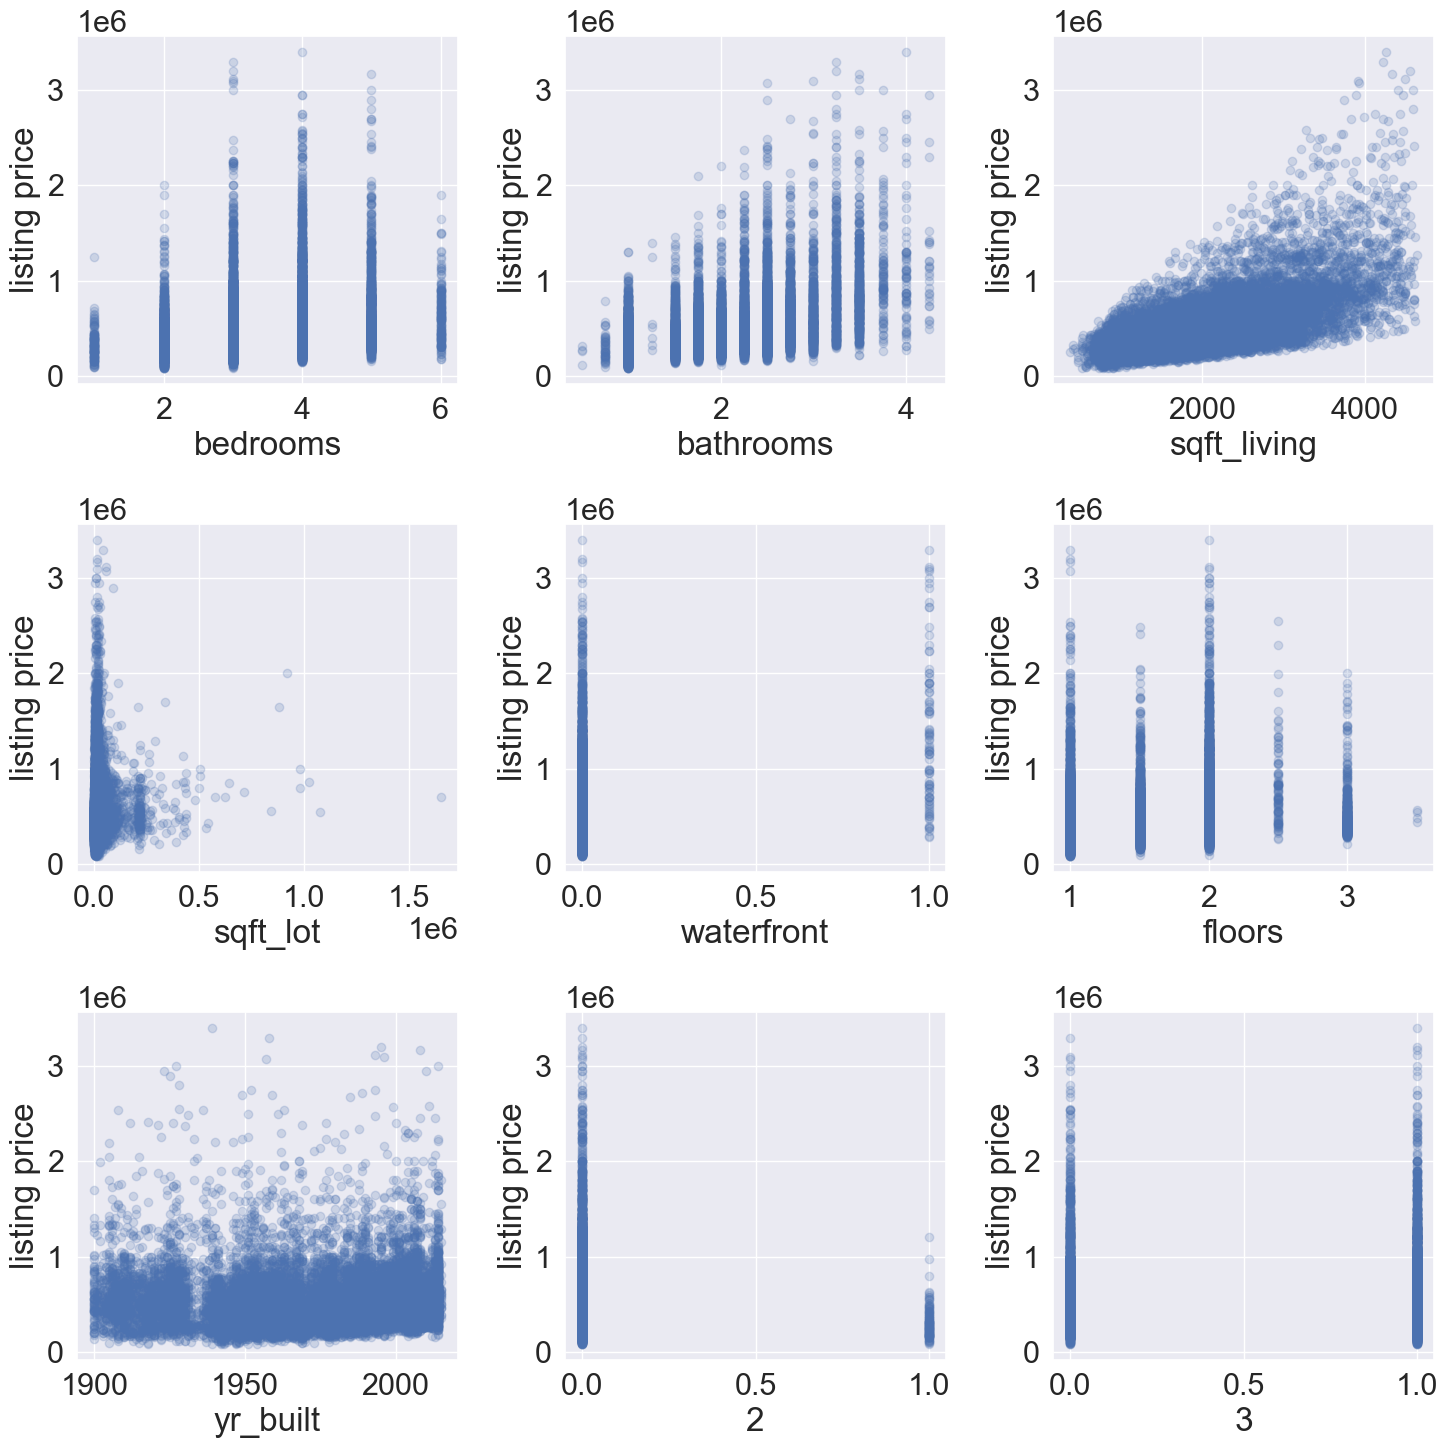

In [415]:
# Create scatter plots for each feature
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index // 3][index % 3] if index < 9 else None  # Check if index is within bounds
    if ax is not None:
        ax.scatter(X_train[col], y_train, alpha=0.2)
        ax.set_xlabel(col)
        ax.set_ylabel("listing price")

# Save the plot as PNG
plt.savefig("scatter_plot_matrix.png")

# Show the plot
plt.show()


In [416]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15733 entries, 4438 to 16247
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype             
---  ------       --------------  -----             
 0   bedrooms     15733 non-null  int64             
 1   bathrooms    15733 non-null  float64           
 2   sqft_living  15733 non-null  int64             
 3   sqft_lot     15733 non-null  int64             
 4   waterfront   15733 non-null  float64           
 5   floors       15733 non-null  float64           
 6   grade        15733 non-null  int32             
 7   yr_built     15733 non-null  int64             
 8   2            1 non-null      Sparse[float64, 0]
 9   3            1 non-null      Sparse[float64, 0]
 10  4            1 non-null      Sparse[float64, 0]
 11  5            1 non-null      Sparse[float64, 0]
dtypes: Sparse[float64, 0](4), float64(3), int32(1), int64(4)
memory usage: 1.2 MB


In [417]:
# Define the subset of columns
subset_columns = ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'floors', 'grade']

# Create X_train_second_model by selecting the subset of columns
X_train_second_model = X_train[subset_columns].copy()
X_train_second_model




,bedrooms,bathrooms,sqft_lot,waterfront,floors,grade
4438,4,2.50,6000,0.0,2.0,8
15353,4,1.50,6383,0.0,1.0,7
6845,4,2.50,7800,0.0,2.0,8
18197,3,1.50,11092,0.0,1.0,7
2198,4,3.75,34982,0.0,2.0,12
...,...,...,...,...,...,...
11604,4,2.75,35070,0.0,1.5,8
12305,2,1.50,1149,0.0,2.0,7
5551,2,2.00,4000,0.0,1.0,7
889,3,2.50,25341,0.0,2.0,9


In [418]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Model #2")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.46954786364807233
Validation score: 0.4603851781118001

Model #2
Train score:      0.4219222881153983
Validation score: 0.4199230132032204


In [419]:
# use StatsModels to fit and evaluate a linear regression model on the same 
# features used in the second model.
sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     2300.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:57:56   Log-Likelihood:            -2.1596e+05
No. Observations:               15733   AIC:                         4.319e+05
Df Residuals:                   15726   BIC:                         4.320e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.163e+05   1.36e+04    -60.204      0.000   -8.43e+05    -7.9e+05
bedrooms    1.767e+04   2405.816      7.346      0.000     1.3e+04    2.24e+04
bathrooms   3.947e+04   3733.831     10.570      0.000    3.21e+04    4.68e+04
sqft_lot       0.0655      0.043      1.516      0.130      -0.019       0.150
waterfront  7.362e+05   2.31e+04     31.905      0.000    6.91e+05    7.81e+05
floors     -4.452e+04   3912.360    -11.379      0.000   -5.22e+04   -3.69e+04
grade        1.65e+05   2139.292     77.116      0.000    1.61e+05    1.69e+05
==============================================================================
Omnibus:                     7255.448   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70378.748
Skew:                           1.977   Prob(JB):                         0.00
Kurtosis:                      12.577   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model #4: Using significant Features

In [420]:
significant_features = ["sqft_living", "grade", "bathrooms"]

In [421]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Model #3")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Model #2")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.48532525501683654
Validation score: 0.4807175934734418

Model #3
Train score:      0.46954786364807233
Validation score: 0.4603851781118001

Model #2
Train score:      0.4219222881153983
Validation score: 0.4199230132032204


##### Selecting Features with sklearn

In [422]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_lot: False
waterfront: True
floors: True
grade: True


In [423]:
from itertools import combinations

# Initialize an empty list to store results
results = []

# Iterate through single features
for feature in features[1:]:
    # Calculate cross-validated scores
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Append results to the list
    results.append({
        "feature1": feature,
        "feature2": "",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    })

# Iterate through combinations of features
for feature1, feature2 in combinations(features[1:], 2):
    # Calculate cross-validated scores
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Append results to the list
    results.append({
        "feature1": feature1,
        "feature2": feature2,
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    })

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df




,feature1,feature2,train_score,val_score,sqft_living
0,sqft_living,,0.414806,0.413556,Yes
1,grade,,0.481754,0.476989,Yes
2,sqft_living,grade,0.481743,0.476978,Yes


The optimal model incorporates sqft_living, grade, and bathrooms, achieving a validation score of 0.4807

##### Q3: What combinations of features is the best fit for price predictions?

Grade, sqft_living, and bathrooms constitute the optimal combination for a multiple regression model. These features exhibit high correlation with price, relatively low multicollinearity, and collectively explain more than half of the variability in price. Moreover, all assumptions of multiple regression are met when these features are included.

### Model #5: Using relevant features & OneHotEncoding

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20978 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20978 non-null  int64  
 1   price        20978 non-null  int32  
 2   bedrooms     20978 non-null  int64  
 3   bathrooms    20978 non-null  float64
 4   sqft_living  20978 non-null  int64  
 5   sqft_lot     20978 non-null  int64  
 6   floors       20978 non-null  float64
 7   waterfront   20978 non-null  float64
 8   condition    20978 non-null  int64  
 9   grade        20978 non-null  int32  
 10  yr_built     20978 non-null  int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 1.8 MB


In [425]:
print(df.head())


           id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900         3       1.00         1180      5650     1.0   
1  6414100192  538000         3       2.25         2570      7242     2.0   
2  5631500400  180000         2       1.00          770     10000     1.0   
3  2487200875  604000         4       3.00         1960      5000     1.0   
4  1954400510  510000         3       2.00         1680      8080     1.0   

   waterfront  condition  grade  yr_built  
0         0.0          3      7      1955  
1         0.0          3      7      1951  
2         0.0          3      6      1933  
3         0.0          5      7      1965  
4         0.0          3      8      1987  


In [426]:
print(df.columns)


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')


In [427]:
condition_train2 = df[['condition']]
ohe2 = OneHotEncoder(categories='auto', handle_unknown='ignore')
ohe2.fit(condition_train2)
ohe2.categories_


[array([1, 2, 3, 4, 5], dtype=int64)]

In [428]:
condition_encoded_train2 = ohe.transform(condition_train2)

condition_encoded_train2


<20978x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20978 stored elements in Compressed Sparse Row format>

In [430]:
import pandas as pd

# Convert the sparse matrix to a DataFrame
condition_encoded_train2_df = pd.DataFrame.sparse.from_spmatrix(
    condition_encoded_train2,
    columns=ohe2.categories_[0],
    index=df.index
)

# Print the DataFrame
print(condition_encoded_train2_df)


         1    2    3    4    5
0      0.0  0.0  1.0  0.0  0.0
1      0.0  0.0  1.0  0.0  0.0
2      0.0  0.0  1.0  0.0  0.0
3      0.0  0.0  0.0  0.0  1.0
4      0.0  0.0  1.0  0.0  0.0
...    ...  ...  ...  ...  ...
21592  0.0  0.0  1.0  0.0  0.0
21593  0.0  0.0  1.0  0.0  0.0
21594  0.0  0.0  1.0  0.0  0.0
21595  0.0  0.0  1.0  0.0  0.0
21596  0.0  0.0  1.0  0.0  0.0

[20978 rows x 5 columns]


In [431]:
df.drop('condition', axis=1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,7,1955
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,7,1951
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,6,1933
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,7,1965
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,8,2009
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,8,2014
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,7,2009
21595,291310100,400000,3,2.50,1600,2388,2.0,0.0,8,2004


In [433]:
import pandas as pd

# Convert the sparse matrix to a DataFrame
condition_encoded_train2_df = pd.DataFrame.sparse.from_spmatrix(
    condition_encoded_train2,
    columns=ohe2.categories_[0],
    index=df.index
)

# Concatenate the DataFrame with the original DataFrame
df = pd.concat([df, condition_encoded_train2_df], axis=1)

# Print the concatenated DataFrame
print(df)


               id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520  221900         3       1.00         1180      5650     1.0   
1      6414100192  538000         3       2.25         2570      7242     2.0   
2      5631500400  180000         2       1.00          770     10000     1.0   
3      2487200875  604000         4       3.00         1960      5000     1.0   
4      1954400510  510000         3       2.00         1680      8080     1.0   
...           ...     ...       ...        ...          ...       ...     ...   
21592   263000018  360000         3       2.50         1530      1131     3.0   
21593  6600060120  400000         4       2.50         2310      5813     2.0   
21594  1523300141  402101         2       0.75         1020      1350     2.0   
21595   291310100  400000         3       2.50         1600      2388     2.0   
21596  1523300157  325000         2       0.75         1020      1076     2.0   

       waterfront  grade  y

In [434]:
df.drop(1, axis=1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,8,2009,0.0,1.0,0.0,0.0
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,8,2014,0.0,1.0,0.0,0.0
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,7,2009,0.0,1.0,0.0,0.0
21595,291310100,400000,3,2.50,1600,2388,2.0,0.0,8,2004,0.0,1.0,0.0,0.0


In [435]:
df1 = df.drop('id', axis=1)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,221900,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,538000,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,180000,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,604000,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,510000,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3.0,0.0,8,2009,0.0,1.0,0.0,0.0
21593,400000,4,2.50,2310,5813,2.0,0.0,8,2014,0.0,1.0,0.0,0.0
21594,402101,2,0.75,1020,1350,2.0,0.0,7,2009,0.0,1.0,0.0,0.0
21595,400000,3,2.50,1600,2388,2.0,0.0,8,2004,0.0,1.0,0.0,0.0


In [436]:
home_preds = df1.drop(['price'], axis=1)
home_target = df1['price']
home_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0


In [437]:
# use sm.add_constant() to add constant term/y-intercept
predictors = sm.add_constant(home_preds)
predictors

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,yr_built,2,3,4,5
0,1.0,3,1.00,1180,5650,1.0,0.0,7,1955,0.0,1.0,0.0,0.0
1,1.0,3,2.25,2570,7242,2.0,0.0,7,1951,0.0,1.0,0.0,0.0
2,1.0,2,1.00,770,10000,1.0,0.0,6,1933,0.0,1.0,0.0,0.0
3,1.0,4,3.00,1960,5000,1.0,0.0,7,1965,0.0,0.0,0.0,1.0
4,1.0,3,2.00,1680,8080,1.0,0.0,8,1987,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.50,1530,1131,3.0,0.0,8,2009,0.0,1.0,0.0,0.0
21593,1.0,4,2.50,2310,5813,2.0,0.0,8,2014,0.0,1.0,0.0,0.0
21594,1.0,2,0.75,1020,1350,2.0,0.0,7,2009,0.0,1.0,0.0,0.0
21595,1.0,3,2.50,1600,2388,2.0,0.0,8,2004,0.0,1.0,0.0,0.0


In [438]:
model_last = sm.OLS(home_target, predictors).fit()

In [439]:
model_last.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2714.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:03:26   Log-Likelihood:            -2.8457e+05
No. Observations:               20978   AIC:                         5.692e+05
Df Residuals:                   20965   BIC:                         5.693e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.271e+06   1.17e+05     53.444      0.000    6.04e+06     6.5e+06
bedrooms    -3.297e+04   1964.610    -16.782      0.000   -3.68e+04   -2.91e+04
bathrooms    4.428e+04   3155.827     14.032      0.000    3.81e+04    5.05e+04
sqft_living   136.4605      3.161     43.168      0.000     130.264     142.657
sqft_lot       -0.1020      0.033     -3.078      0.002      -0.167      -0.037
floors       2.771e+04   3048.120      9.091      0.000    2.17e+04    3.37e+04
waterfront    6.05e+05   1.74e+04     34.702      0.000    5.71e+05    6.39e+05
grade        1.324e+05   1916.038     69.122      0.000    1.29e+05    1.36e+05
yr_built    -3585.1348     59.361    -60.396      0.000   -3701.486   -3468.783
2           -2.727e+04   3.86e+04     -0.706      0.480   -1.03e+05    4.84e+04
3           -3446.1909   3.58e+04     -0.096      0.923   -7.36e+04    6.67e+04
4            1.041e+04   3.58e+04      0.291      0.771   -5.97e+04    8.05e+04
5            4.853e+04    3.6e+04      1.349      0.177    -2.2e+04    1.19e+05
==============================================================================
Omnibus:                     9066.183   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102134.623
Skew:                           1.772   Prob(JB):                         0.00
Kurtosis:                      13.212   Cond. No.                     3.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [440]:
X3_train, X3_test, y3_train, y3_test = train_test_split(home_preds, home_target, random_state=42)

In [441]:
print(f"X3_train is a DataFrame with {X3_train.shape[0]} rows and {X3_train.shape[1]} columns")
print(f"y3_train is a Series with {y3_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X3_train.shape[0] == y3_train.shape[0]

X3_train is a DataFrame with 15733 rows and 12 columns
y3_train is a Series with 15733 values


In [442]:
X3_train_final = X3_train
X3_test_final = X3_test

In [445]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Convert all column names to strings
X3_test_final.columns = X3_test_final.columns.astype(str)


# Create and fit the LinearRegression model
final_model1 = LinearRegression()
final_model1.fit(X3_train_final, y3_train)

# Evaluate the model
final_model1.score(X3_test_final, y3_test)


0.6172888187558685

In [446]:
print(pd.Series(final_model1.coef_, index=X3_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model1.intercept_)

bedrooms       -34176.178912
bathrooms       45405.475771
sqft_living       134.687758
sqft_lot           -0.073950
floors          27755.688990
waterfront     607066.744164
grade          134307.611086
yr_built        -3604.595878
2               24583.808899
3               47732.087851
4               63586.399956
5              100360.721272
Name: Coefficients, dtype: float64

Intercept: 6248401.994385188
